In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import collections

%matplotlib inline

In [0]:
# Set parameters for plot size and dataframes
rcParams['figure.figsize'] = 20,14
pd.set_option('display.max_columns', 5000)


In [5]:
# load the data from dropbox
y2015 = pd.read_csv(
    'https://www.dropbox.com/s/0so14yudedjmm5m/LoanStats3d.csv?dl=1',
    skipinitialspace=True,
    header=1
)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# brief look at the data
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,Bookkeeper/Accounting,10+ years,MORTGAGE,48000.0,Not Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,297xx,SC,33.18,0.0,Jun-1991,0.0,33.0,2.0,11.0,2.0,19108.0,29.6%,19.0,w,13668.88,13668.88,4519.68,4519.68,2331.12,2188.56,0.0,0.0,0.0,Jan-2017,379.39,Jan-2017,Jan-2017,0.0,33.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,31329.0,1.0,2.0,1.0,2.0,6.0,12221.0,91.0,1.0,4.0,14982.0,65.0,284700.0,0.0,0.0,1.0,6.0,2848.0,263953.0,17.6,0.0,0.0,131.0,294.0,11.0,6.0,2.0,11.0,76.0,11.0,76.0,2.0,6.0,9.0,6.0,8.0,6.0,9.0,11.0,9.0,11.0,0.0,0.0,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,tech,8 years,MORTGAGE,60000.0,Not Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,299xx,SC,22.44,0.0,Jun-1996,0.0,NaN,NaN,7.0,0.0,7722.0,59.4%,9.0,w,6635.69,6635.69,3572.97,3572.97,2964.31,608.66,0.0,0.0,0.0,Jan-2017,298.58,Jan-2017,Jan-2017,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,55387.0,0.0,3.0,0.0,0.0,47.0,47665.0,43.0,2.0,2.0,4744.0,50.0,13000.0,0.0,0.0,2.0,2.0,7912.0,4778.0,61.8,0.0,0.0,234.0,91.0,9.0,9.0,0.0,11.0,NaN,9.0,NaN,0.0,3.0,3.0,3.0,3.0,5.0,4.0,4.0,3.0,7.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,Sales Manager,10+ years,MORTGAGE,109000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,226xx,VA,26.02,0.0,Dec-2001,1.0,NaN,NaN,9.0,0.0,20862.0,54.3%,19.0,w,0.00,0.00,26224.23,26224.23,25000.00,1224.23,0.0,0.0,0.0,Sep-2016,20807.39,NaN,Jan-2017,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,305781.0,0.0,3.0,0.0,1.0,13.0,47194.0,58.0,0.0,1.0,8937.0,57.0,38400.0,1.0,0.0,1.0,2.0,33976.0,17538.0,54.3,0.0,0.0,142.0,168.0,13.0,13.0,3.0,13.0,NaN,0.0,NaN,0.0,3.0,3.0,5.0,6.0,7.0,5.0,9.0,3.0,9.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,Senior Manager,10+ years,MORTGAGE,92000.0,Not Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,275xx,NC,21.60,0.0,May-1984,0.0,42.0,NaN,16.0,0.0,51507.0,6

In [7]:
# Look at all of the objects which are typed as a object as considered categorical
categorical = y2015.select_dtypes(include=['object'])
categorical.head()

,id,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
0,68009401,60 months,14.85%,C,C5,Bookkeeper/Accounting,10+ years,MORTGAGE,Not Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,297xx,SC,Jun-1991,29.6%,w,Jan-2017,Jan-2017,Jan-2017,INDIVIDUAL,NaN
1,68354783,36 months,7.49%,A,A4,tech,8 years,MORTGAGE,Not Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,299xx,SC,Jun-1996,59.4%,w,Jan-2017,Jan-2017,Jan-2017,INDIVIDUAL,NaN
2,68466916,36 months,7.49%,A,A4,Sales Manager,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,226xx,VA,Dec-2001,54.3%,w,Sep-2016,NaN,Jan-2017,INDIVIDUAL,NaN
3,68466961,36 months,6.49%,A,A2,Senior Manager,10+ years,MORTGAGE,Not Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,275xx,NC,May-1984,64.5%,w,Jan-2017,Jan-2017,Jan-2017,INDIVIDUAL,NaN
4,68495092,36 months,19.89%,E,E3,Program Coordinator,8 years,RENT,Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,462xx,IN,Mar-2005,46%,w,May-2016,NaN,Jun-2016,INDIVIDUAL,NaN


In [0]:
# count the occurances of unique values in the categorical dataframe and put them in a dictionary 
cat_count = {}

for i in categorical:
  column = categorical
  cat_count[i] = column.nunique()

In [9]:
cat_count

{'addr_state': id                           421097
 term                              2
 int_rate                        110
 grade                             7
 sub_grade                        35
 emp_title                    120812
 emp_length                       11
 home_ownership                    4
 verification_status               3
 issue_d                          12
 loan_status                       7
 pymnt_plan                        1
 url                          421095
 desc                             34
 purpose                          14
 title                            27
 zip_code                        914
 addr_state                       49
 earliest_cr_line                668
 revol_util                     1211
 initial_list_status               2
 last_pymnt_d                     25
 next_pymnt_d                      4
 last_credit_pull_d               26
 application_type                  2
 verification_status_joint         3
 dtype: int64, 'applicat

In [0]:
# convert ID and interest rate to numeric 
y2015['id'] = pd.to_numeric(y2015['id'], errors = 'coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
           'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

# remove two summary rows at the end that don't actually contain any data
y2015 = y2015[:-2]

In [0]:
# Initialize the model, select the target and the features

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
y = y2015['loan_status']

# separate the categorical data into dummy variables
X = pd.get_dummies(X)
# Remove the columns with nan
X = X.dropna(axis=1)

In [0]:
# run model with all the data
score = cross_val_score(rfc, X, y, cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

In [0]:
print(score)
print(score.mean())

[0.98021895 0.98078887 0.9813113  0.98162    0.97102826 0.97829494
 0.91939965 0.98071671 0.98000332 0.97981285]
0.9733194857246238


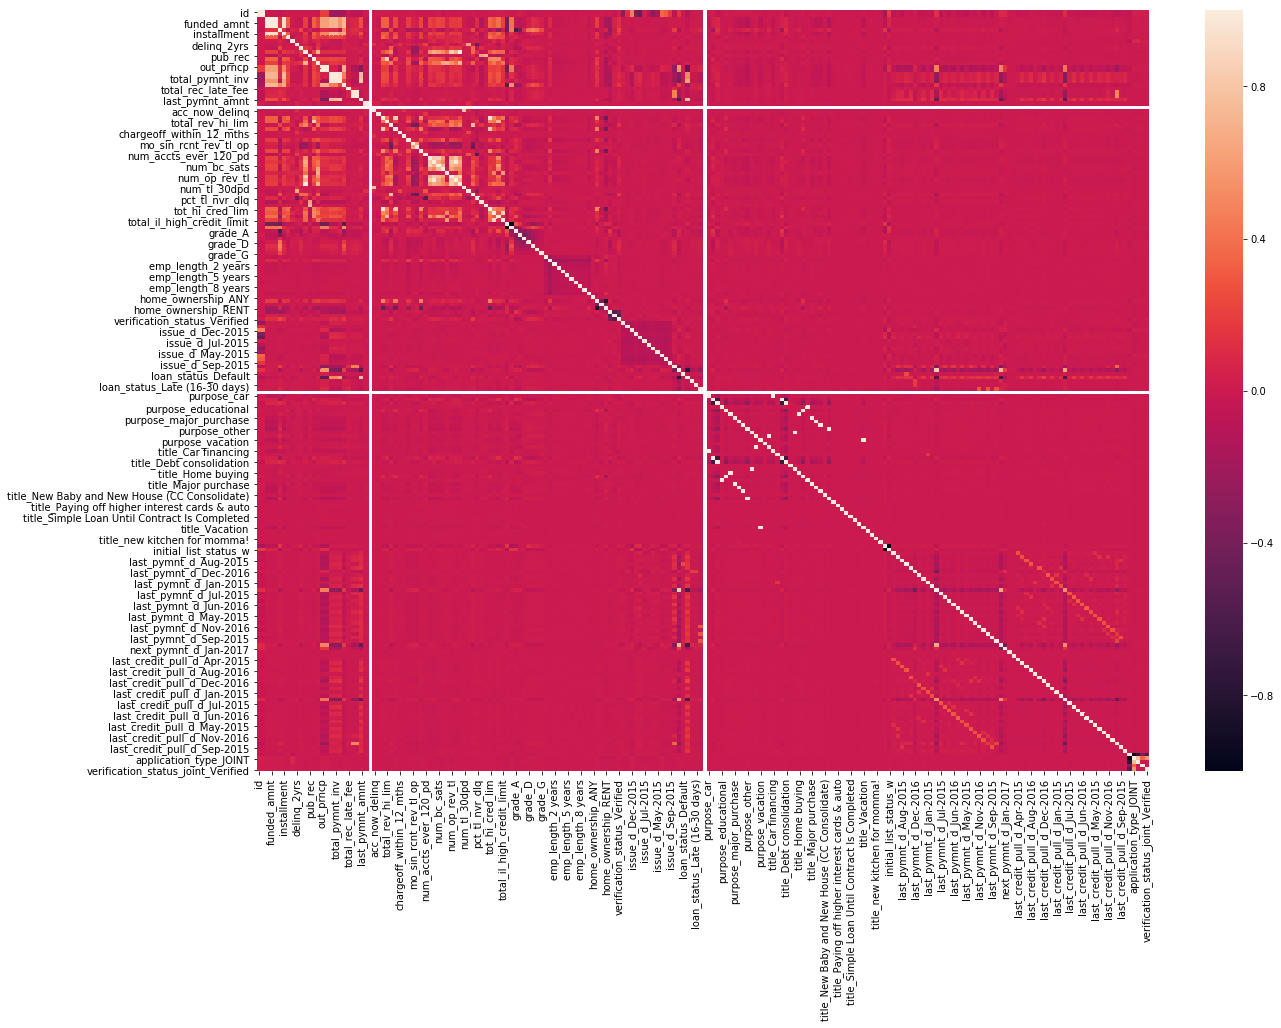

In [12]:
X = pd.get_dummies(y2015)
X = X.dropna(axis=1)

corrmat = X.corr()
sns.heatmap(corrmat)

In [13]:
corrmat.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_Apr-2015,issue_d_Aug-2015,issue_d_Dec-2015,issue_d_Feb-2015,issue_d_Jan-2015,issue_d_Jul-2015,issue_d_Jun-2015,issue_d_Mar-2015,issue_d_May-2015,issue_d_Nov-2015,issue_d_Oct-2015,issue_d_Sep-2015,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),pymnt_plan_n,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,title_Business,title_Car financing,title_Credit Card/Auto Repair,title_Credit card refinancing,title_Debt consolidation,title_DebtC,title_Green loan,title_Home buying,title_Home improvement,title_Learning and training,title_Major purchase,title_Medical expenses,title_Moving and relocation,title_New Baby and New House (CC Consolidate),title_Other,title_Pay off Lowes Card,title_Paying off higher interest cards & auto,title_Prescription Drug and Medical Costs,title_SAVE,title_Simple Loan Until Contract Is Completed,title_Student Loan,title_Trying to come back to reality!,title_Vacation,title_considerate,title_new day,title_new kitchen for momma!,title_odymeds,initial_list_status_f,initial_list_status_w,last_pymnt_d_Apr-2015,last_pymnt_d_Apr-2016,last_pymnt_d_Aug-2015,last_pymnt_d_Aug-2016,last_pymnt_d_Dec-2015,last_pymnt_d_Dec-2016,last_pymnt_d_Feb-2015,last_pymnt_d_Feb-2016,last_pymnt_d_Jan-2015,last_pymnt_d_Jan-2016,last_pymnt_d_Jan-2017,last_pymnt_d_Jul-2015,last_pymnt_d_Jul-2016,last_pymnt_d_Jun-2015,last_pymnt_d_Jun-2016,last_pymnt_d_Mar-2015,last_pymnt_d_Mar-2016,last_pymnt_d_May-2015,last_pymnt_d_May-2016,last_pymnt_d_Nov-2015,last_pymnt_d_Nov-2016,last_pymnt_d_Oct-2015,last_pymnt_d_Oct-2016,last_pymnt_d_Sep-2015,last_pymnt_d_Sep-2016,next_pymnt_d_Feb-2017,next_pymnt_d_Jan-2017,next_pymnt_d_Jul-2016,next_pymnt_d_Mar-2017,last_credit_pull_d_Apr-2015,last_credit_pull_d_Apr-2016,last_credit_pull_d_Aug-2015,last_credit_pull_d_Aug-2016,last_credit_pull_d_Dec-2014,last_credit_pull_d_Dec-2015,last_credit_pull_d_Dec-2016,last_credit_pull_d_Feb-2015,last_credit_pull_d_Feb-2016,last_credit_pull_d_Jan-2015,last_credit_pull_d_Jan-2016,last_credit_pull_d_Jan-2017,last_credit_pull_d_Jul-2015,last_credit_pull_d_Jul-2016,last_credit_pull_d_Jun-2015,last_credit_pull_d_Jun-2016,last_credit_pull_d_Mar-2015,last_credit_pull_d_Mar-2016,last_credit_pull_d_May-2015,last_credit_pull_d_May-2016,last_credit_pull_d_Nov-2015,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last

In [14]:
X.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_Apr-2015,issue_d_Aug-2015,issue_d_Dec-2015,issue_d_Feb-2015,issue_d_Jan-2015,issue_d_Jul-2015,issue_d_Jun-2015,issue_d_Mar-2015,issue_d_May-2015,issue_d_Nov-2015,issue_d_Oct-2015,issue_d_Sep-2015,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),pymnt_plan_n,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,title_Business,title_Car financing,title_Credit Card/Auto Repair,title_Credit card refinancing,title_Debt consolidation,title_DebtC,title_Green loan,title_Home buying,title_Home improvement,title_Learning and training,title_Major purchase,title_Medical expenses,title_Moving and relocation,title_New Baby and New House (CC Consolidate),title_Other,title_Pay off Lowes Card,title_Paying off higher interest cards & auto,title_Prescription Drug and Medical Costs,title_SAVE,title_Simple Loan Until Contract Is Completed,title_Student Loan,title_Trying to come back to reality!,title_Vacation,title_considerate,title_new day,title_new kitchen for momma!,title_odymeds,initial_list_status_f,initial_list_status_w,last_pymnt_d_Apr-2015,last_pymnt_d_Apr-2016,last_pymnt_d_Aug-2015,last_pymnt_d_Aug-2016,last_pymnt_d_Dec-2015,last_pymnt_d_Dec-2016,last_pymnt_d_Feb-2015,last_pymnt_d_Feb-2016,last_pymnt_d_Jan-2015,last_pymnt_d_Jan-2016,last_pymnt_d_Jan-2017,last_pymnt_d_Jul-2015,last_pymnt_d_Jul-2016,last_pymnt_d_Jun-2015,last_pymnt_d_Jun-2016,last_pymnt_d_Mar-2015,last_pymnt_d_Mar-2016,last_pymnt_d_May-2015,last_pymnt_d_May-2016,last_pymnt_d_Nov-2015,last_pymnt_d_Nov-2016,last_pymnt_d_Oct-2015,last_pymnt_d_Oct-2016,last_pymnt_d_Sep-2015,last_pymnt_d_Sep-2016,next_pymnt_d_Feb-2017,next_pymnt_d_Jan-2017,next_pymnt_d_Jul-2016,next_pymnt_d_Mar-2017,last_credit_pull_d_Apr-2015,last_credit_pull_d_Apr-2016,last_credit_pull_d_Aug-2015,last_credit_pull_d_Aug-2016,last_credit_pull_d_Dec-2014,last_credit_pull_d_Dec-2015,last_credit_pull_d_Dec-2016,last_credit_pull_d_Feb-2015,last_credit_pull_d_Feb-2016,last_credit_pull_d_Jan-2015,last_credit_pull_d_Jan-2016,last_credit_pull_d_Jan-2017,last_credit_pull_d_Jul-2015,last_credit_pull_d_Jul-2016,last_credit_pull_d_Jun-2015,last_credit_pull_d_Jun-2016,last_credit_pull_d_Mar-2015,last_credit_pull_d_Mar-2016,last_credit_pull_d_May-2015,last_credit_pull_d_May-2016,last_credit_pull_d_Nov-2015,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last

In [0]:
# select the non dummy columns
df_1 = X[X.columns[:104]]

In [0]:
df_1 = df_1.drop(df_1.columns[58:97], axis=1)

In [0]:
# Drop more features 
df_1 = df_1.drop(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'policy_code'], axis=1)

In [0]:
corrmat = df_1.corr()

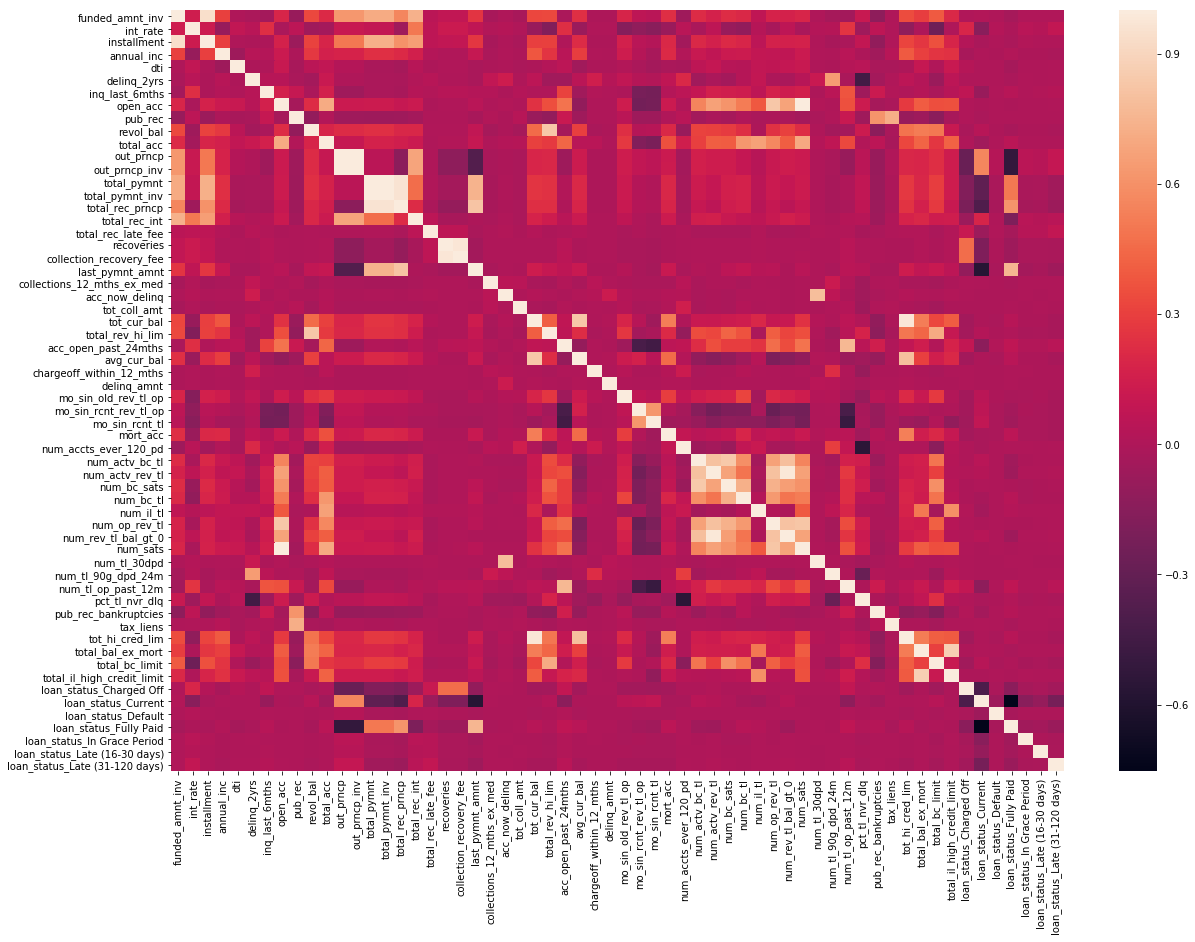

In [19]:
sns.heatmap(corrmat)

In [20]:
corrmat

,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days)
funded_amnt_inv,1.000000,0.140209,0.941187,0.305803,0.006044,-0.010448,-0.039103,0.188212,-0.088885,0.334664,0.208464,0.623858,0.623899,0.706259,0.706239,0.556377,0.736483,0.051861,0.077869,0.079186,0.259878,-0.027480,0.000630,-0.021435,0.325401,0.330958,-0.010221,0.238198,-0.005397,-0.002097,0.183840,0.066593,0.041750,0.231630,-0.057389,0.212987,0.164525,0.222211,0.203576,0.074842,0.174879,0.166253,0.189325,0.002448,-0.031349,-0.042263,0.105096,-0.124394,0.002070,0.347355,0.289554,0.395973,0.203085,0.011844,0.015401,0.001965,-0.033178,0.011769,0.009872,0.009298
int_rate,0.140209,1.000000,0.124426,-0.090399,0.077932,0.043710,0.231139,-0.012985,0.058231,-0.057412,-0.040211,0.106315,0.106081,0.087256,0.087028,-0.057379,0.504617,0.063685,0.119825,0.123180,0.069755,0.019234,0.027495,0.009697,-0.087011,-0.174886,0.228782,-0.081874,0.011913,0.009647,-0.160134,-0.122028,-0.150179,-0.076131,0.044632,-0.018758,0.066422,-0.083299,-0.115968,0.033268,-0.022543,0.063938,-0.014050,0.021897,0.031344,0.256831,-0.061652,0.065078,0.012234,-0.121081,-0.000676,-0.257222,0.004055,0.191282,-0.144180,0.023909,-0.003648,0.043713,0.034146,0.082766
installment,0.941187,0.124426,1.000000,0.297393,0.001893,-0.002129,-0.006255,0.169995,-0.073399,0.314090,0.183509,0.506732,0.506745,0.732579,0.732545,0.608280,0.654990,0.063739,0.082061,0.084164,0.264130,-0.022146,0.004108,-0.016802,0.295468,0.303476,0.010295,0.215902,-0.002996,-0.000760,0.158800,0.047059,0.027120,0.202128,-0.045646,0.202271,0.161092,0.208238,0.186971,0.056563,0.164643,0.161079,0.170649,0.005279,-0.024302,-0.010656,0.085217,-0.112663,0.010279,0.315373,0.265224,0.358718,0.181215,0.021777,-0.014418,0.002959,-0.007999,0.015357,0.011804,0.013250
annual_inc,0.305803,-0.090399,0.297393,1.000000,-0.068237,0.037910,0.022990,0.122328,-0.006739,0.270174,0.159804,0.171780,0.171836,0.233817,0.233854,0.209988,0.157346,0.025224,0.011110,0.010418,0.098264,-0.007785,0.012628,-0.000509,0.379008,0.256553,0.045446,0.293642,0.007422,0.005693,0.130148,0.031403,-0.021290,0.209046,0.016400,0.106892,0.074204,0.120446,0.125379,0.084127,0.076375,0.073739,0.122114,0.011602,0.005709,0.045330,-0.005866,-0.050312,0.038323,0.391129,0.297563,0.257184,0.242637,-0.026646,0.003351,-0.001643,0.017387,-0.000508,-0.001678,-0.010951
dti,0.006044,0.077932,0.001893,-0.068237,1.000000,-0.005868,0.003277,0.104364,-0.023200,0.048135,0.080499,0.022774,0.022736,-0.015898,-0.015935,-0.029406,0.039614,-0.001150,0.009553,0.010185,-0.018194,-0.003588,0.000583,-0.007619,-0.005142,0.026437,0.055647,-0.050366,-0.002340,-0.002667,0.018276,-0.012088,-0.037806,-0.020044,-0.022060,0.062764,0.094225,0.040617,0.028171,0.081730,0.068513,0.095454,0.104280,0.002671,-0.005476,0.031698,0.042020,-0.015054,-0.014954,-0.000674,0.100831,0.012969,0.113685,0.027532,0.004559,0.003209,-0.028381,0.005063,0.004066,0.010120
delinq_2yrs,-0.010448,0.043710,-0.002129,0.037910,-0.005868,1.000000,0.036139,0.040005,-0.015220,-0.035801,0.114623,0.000939,0.000926,-0.013173,-0.013186,-0.019934,0.018005,0.036797,0.004777,0.005

In [0]:
# select more features with high covarience to remove
df_1_1 = df_1.drop(['out_prncp_inv', 'total_pymnt_inv', 'collection_recovery_fee'], axis=1)

In [22]:
df_1_1.shape

(421095, 57)

In [0]:
df_1_1 = df_1_1.drop(df_1_1.columns[50:], axis=1)

In [0]:
# scale the data
scaler = StandardScaler()

In [0]:
scaled_data = scaler.fit_transform(df_1_1)

In [0]:
pca = PCA(n_components=20)
x_pca = pca.fit_transform(scaled_data)

In [27]:
score = cross_val_score(rfc, x_pca, y, cv=10)
print(score)
print(score.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

[0.89750896 0.90076227 0.90211584 0.90555912 0.90417953 0.90463073
 0.90241991 0.90163623 0.90505142 0.89771054]
0.9021574545389702


In [0]:
x_bar = df_1[df_1.columns[53:]]

In [0]:
for col in df_1_1:
  df_1_1.mean()

In [0]:
corr_df = pd.DataFrame(index = x_bar.columns, columns = df_1_1.columns)


In [32]:
corr_df

,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_status_Charged Off,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_status_Current,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_status_Default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_status_Fully Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_status_In Grace Period,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_status_Late (16-30 days),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_status_Late (31-120 days),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
corrmat.head()

,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days)
funded_amnt_inv,1.000000,0.140209,0.941187,0.305803,0.006044,-0.010448,-0.039103,0.188212,-0.088885,0.334664,0.208464,0.623858,0.623899,0.706259,0.706239,0.556377,0.736483,0.051861,0.077869,0.079186,0.259878,-0.027480,0.000630,-0.021435,0.325401,0.330958,-0.010221,0.238198,-0.005397,-0.002097,0.183840,0.066593,0.041750,0.231630,-0.057389,0.212987,0.164525,0.222211,0.203576,0.074842,0.174879,0.166253,0.189325,0.002448,-0.031349,-0.042263,0.105096,-0.124394,0.002070,0.347355,0.289554,0.395973,0.203085,0.011844,0.015401,0.001965,-0.033178,0.011769,0.009872,0.009298
int_rate,0.140209,1.000000,0.124426,-0.090399,0.077932,0.043710,0.231139,-0.012985,0.058231,-0.057412,-0.040211,0.106315,0.106081,0.087256,0.087028,-0.057379,0.504617,0.063685,0.119825,0.123180,0.069755,0.019234,0.027495,0.009697,-0.087011,-0.174886,0.228782,-0.081874,0.011913,0.009647,-0.160134,-0.122028,-0.150179,-0.076131,0.044632,-0.018758,0.066422,-0.083299,-0.115968,0.033268,-0.022543,0.063938,-0.014050,0.021897,0.031344,0.256831,-0.061652,0.065078,0.012234,-0.121081,-0.000676,-0.257222,0.004055,0.191282,-0.144180,0.023909,-0.003648,0.043713,0.034146,0.082766
installment,0.941187,0.124426,1.000000,0.297393,0.001893,-0.002129,-0.006255,0.169995,-0.073399,0.314090,0.183509,0.506732,0.506745,0.732579,0.732545,0.608280,0.654990,0.063739,0.082061,0.084164,0.264130,-0.022146,0.004108,-0.016802,0.295468,0.303476,0.010295,0.215902,-0.002996,-0.000760,0.158800,0.047059,0.027120,0.202128,-0.045646,0.202271,0.161092,0.208238,0.186971,0.056563,0.164643,0.161079,0.170649,0.005279,-0.024302,-0.010656,0.085217,-0.112663,0.010279,0.315373,0.265224,0.358718,0.181215,0.021777,-0.014418,0.002959,-0.007999,0.015357,0.011804,0.013250
annual_inc,0.305803,-0.090399,0.297393,1.000000,-0.068237,0.037910,0.022990,0.122328,-0.006739,0.270174,0.159804,0.171780,0.171836,0.233817,0.233854,0.209988,0.157346,0.025224,0.011110,0.010418,0.098264,-0.007785,0.012628,-0.000509,0.379008,0.256553,0.045446,0.293642,0.007422,0.005693,0.130148,0.031403,-0.021290,0.209046,0.016400,0.106892,0.074204,0.120446,0.125379,0.084127,0.076375,0.073739,0.122114,0.011602,0.005709,0.045330,-0.005866,-0.050312,0.038323,0.391129,0.297563,0.257184,0.242637,-0.026646,0.003351,-0.001643,0.017387,-0.000508,-0.001678,-0.010951
dti,0.006044,0.077932,0.001893,-0.068237,1.000000,-0.005868,0.003277,0.104364,-0.023200,0.048135,0.080499,0.022774,0.022736,-0.015898,-0.015935,-0.029406,0.039614,-0.001150,0.009553,0.010185,-0.018194,-0.003588,0.000583,-0.007619,-0.005142,0.026437,0.055647,-0.050366,-0.002340,-0.002667,0.018276,-0.012088,-0.037806,-0.020044,-0.022060,0.062764,0.094225,0.040617,0.028171,0.081730,0.068513,0.095454,0.104280,0.002671,-0.005476,0.031698,0.042020,-0.015054,-0.014954,-0.000674,0.100831,0.012969,0.113685,0.027532,0.004559,0.003209,-0.028381,0.005063,0.004066,0.010120


In [34]:
bar_corr = corrmat[54:]
bar_corr

,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days)
loan_status_Current,0.015401,-0.144180,-0.014418,0.003351,0.004559,0.000854,-0.083236,-0.004811,-0.013627,0.035122,-0.050490,0.555151,0.555196,-0.320038,-0.320022,-0.389478,0.180020,-0.073964,-0.185216,-0.185970,-0.569426,0.001837,-0.001495,-0.000171,-0.002189,0.025934,-0.132478,-0.004915,-0.001787,-0.001052,0.052325,0.067427,0.081576,-0.016541,-0.015712,0.042046,0.031898,0.010027,-0.027150,-0.039417,-0.002923,0.035653,-0.004537,-0.000952,-0.003996,-0.126972,-0.010820,-0.040475,0.013446,0.003654,0.007840,0.038308,-0.000985,-0.400083,1.000000,-0.063811,-0.753602,-0.149283,-0.098402,-0.222884
loan_status_Default,0.001965,0.023909,0.002959,-0.001643,0.003209,0.000028,0.009081,0.003726,0.003274,-0.004585,0.001583,0.028535,0.028514,-0.020238,-0.020246,-0.023008,0.004247,0.009002,-0.005497,-0.005520,-0.015336,-0.001080,-0.002431,-0.000348,-0.008145,-0.006605,0.014486,-0.009216,-0.000605,-0.000763,-0.004901,-0.008024,-0.009564,-0.007155,0.001660,0.001452,0.004351,0.000347,0.000848,0.002498,0.002465,0.004359,0.003719,-0.001784,-0.000949,0.012649,-0.005022,0.005380,0.001183,-0.009085,0.000159,-0.007774,0.001225,-0.011874,-0.063811,1.000000,-0.022367,-0.004431,-0.002921,-0.006615
loan_status_Fully Paid,-0.033178,-0.003648,-0.007999,0.017387,-0.028381,-0.013399,0.034420,-0.006400,0.004848,-0.021251,0.053061,-0.519681,-0.519706,0.503723,0.503716,0.611635,-0.195000,-0.029847,-0.064921,-0.065185,0.753773,-0.010047,-0.001725,0.001692,0.039465,0.006790,0.071736,0.045476,0.000455,0.000707,-0.016640,-0.038524,-0.048684,0.057780,0.009826,-0.052339,-0.057560,-0.006677,0.038957,0.026457,-0.006038,-0.061738,-0.006783,-0.000055,-0.001855,0.071918,0.015095,0.032111,-0.017280,0.038666,-0.007585,0.006591,-0.001477,-0.140234,-0.753602,-0.022367,1.000000,-0.052326,-0.034491,-0.078124
loan_status_In Grace Period,0.011769,0.043713,0.015357,-0.000508,0.005063,0.012607,0.011080,0.002355,0.002760,-0.002287,0.001479,0.052958,0.052952,-0.015422,-0.015425,-0.028790,0.044390,0.040559,-0.012860,-0.012913,-0.038199,0.002628,0.001555,-0.000561,-0.003728,-0.014248,0.015246,-0.004719,0.003420,-0.001243,-0.013419,-0.005632,-0.008135,-0.011905,0.007853,-0.002362,0.008148,-0.010288,-0.011589,0.012994,-0.004023,0.008881,0.002361,0.002614,0.005930,0.013507,-0.012517,0.000038,0.002765,-0.006621,0.005963,-0.022475,0.006928,-0.027779,-0.149283,-0.004431,-0.052326,1.000000,-0.006832,-0.015476
loan_status_Late (16-30 days),0.009872,0.034146,0.011804,-0.001678,0.004066,0.006480,0.013712,0.005288,0.002168,-0.002453,0.002731,0.039482,0.039467,-0.011901,-0.011910,-0.021241,0.030497,0.038381,-0.008477,-0.008512,-0.024854,0.000629,-0.001024,0.003098,-0.002539,-0.007676,0.016068,-0.004113,-0.001420,-0.000860,-0.005320,-0.008022,-0.007442,-0.008515,0.003198,0.003379,0.007706,-0.001735,-0.003950,0.007487,0.002635,0.008074,0.005344,-0.001376,0.003191,0.011912,-0.005245,0.000786,0.001290,-0.004111,0.004681,-0.012040,0.005943,-0.018311,-0.098402,-0.002921,-0.034491,-0.006832,1.000000,-0.010201
loan_status_Late (31-120 days),0.009298,0.082766

In [35]:
y_val = bar_corr.reset_index()
y_val = y_val.drop('index', axis=1)
y_val  

,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days)
0,0.015401,-0.144180,-0.014418,0.003351,0.004559,0.000854,-0.083236,-0.004811,-0.013627,0.035122,-0.050490,0.555151,0.555196,-0.320038,-0.320022,-0.389478,0.180020,-0.073964,-0.185216,-0.185970,-0.569426,0.001837,-0.001495,-0.000171,-0.002189,0.025934,-0.132478,-0.004915,-0.001787,-0.001052,0.052325,0.067427,0.081576,-0.016541,-0.015712,0.042046,0.031898,0.010027,-0.027150,-0.039417,-0.002923,0.035653,-0.004537,-0.000952,-0.003996,-0.126972,-0.010820,-0.040475,0.013446,0.003654,0.007840,0.038308,-0.000985,-0.400083,1.000000,-0.063811,-0.753602,-0.149283,-0.098402,-0.222884
1,0.001965,0.023909,0.002959,-0.001643,0.003209,0.000028,0.009081,0.003726,0.003274,-0.004585,0.001583,0.028535,0.028514,-0.020238,-0.020246,-0.023008,0.004247,0.009002,-0.005497,-0.005520,-0.015336,-0.001080,-0.002431,-0.000348,-0.008145,-0.006605,0.014486,-0.009216,-0.000605,-0.000763,-0.004901,-0.008024,-0.009564,-0.007155,0.001660,0.001452,0.004351,0.000347,0.000848,0.002498,0.002465,0.004359,0.003719,-0.001784,-0.000949,0.012649,-0.005022,0.005380,0.001183,-0.009085,0.000159,-0.007774,0.001225,-0.011874,-0.063811,1.000000,-0.022367,-0.004431,-0.002921,-0.006615
2,-0.033178,-0.003648,-0.007999,0.017387,-0.028381,-0.013399,0.034420,-0.006400,0.004848,-0.021251,0.053061,-0.519681,-0.519706,0.503723,0.503716,0.611635,-0.195000,-0.029847,-0.064921,-0.065185,0.753773,-0.010047,-0.001725,0.001692,0.039465,0.006790,0.071736,0.045476,0.000455,0.000707,-0.016640,-0.038524,-0.048684,0.057780,0.009826,-0.052339,-0.057560,-0.006677,0.038957,0.026457,-0.006038,-0.061738,-0.006783,-0.000055,-0.001855,0.071918,0.015095,0.032111,-0.017280,0.038666,-0.007585,0.006591,-0.001477,-0.140234,-0.753602,-0.022367,1.000000,-0.052326,-0.034491,-0.078124
3,0.011769,0.043713,0.015357,-0.000508,0.005063,0.012607,0.011080,0.002355,0.002760,-0.002287,0.001479,0.052958,0.052952,-0.015422,-0.015425,-0.028790,0.044390,0.040559,-0.012860,-0.012913,-0.038199,0.002628,0.001555,-0.000561,-0.003728,-0.014248,0.015246,-0.004719,0.003420,-0.001243,-0.013419,-0.005632,-0.008135,-0.011905,0.007853,-0.002362,0.008148,-0.010288,-0.011589,0.012994,-0.004023,0.008881,0.002361,0.002614,0.005930,0.013507,-0.012517,0.000038,0.002765,-0.006621,0.005963,-0.022475,0.006928,-0.027779,-0.149283,-0.004431,-0.052326,1.000000,-0.006832,-0.015476
4,0.009872,0.034146,0.011804,-0.001678,0.004066,0.006480,0.013712,0.005288,0.002168,-0.002453,0.002731,0.039482,0.039467,-0.011901,-0.011910,-0.021241,0.030497,0.038381,-0.008477,-0.008512,-0.024854,0.000629,-0.001024,0.003098,-0.002539,-0.007676,0.016068,-0.004113,-0.001420,-0.000860,-0.005320,-0.008022,-0.007442,-0.008515,0.003198,0.003379,0.007706,-0.001735,-0.003950,0.007487,0.002635,0.008074,0.005344,-0.001376,0.003191,0.011912,-0.005245,0.000786,0.001290,-0.004111,0.004681,-0.012040,0.005943,-0.018311,-0.098402,-0.002921,-0.034491,-0.006832,1.000000,-0.010201
5,0.009298,0.082766,0.013250,-0.010951,0.010120,0.012031,0.030313,0.010193,0.006563,-0.013080,0.002837,0.092312,0.092278,-0.052595,-0.052611,-0.068905,0.043749

In [36]:
bar_corr.index

Index(['loan_status_Current', 'loan_status_Default', 'loan_status_Fully Paid',
       'loan_status_In Grace Period', 'loan_status_Late (16-30 days)',
       'loan_status_Late (31-120 days)'],
      dtype='object')

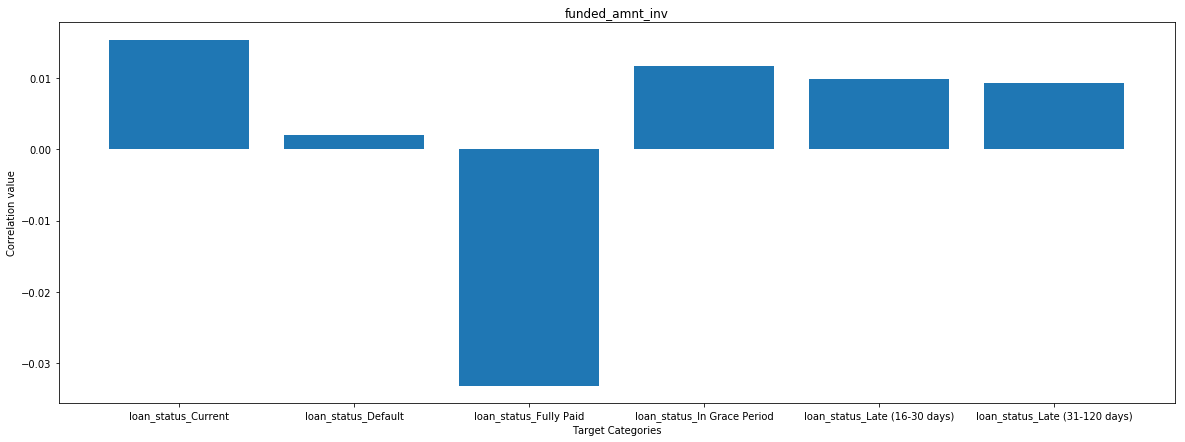

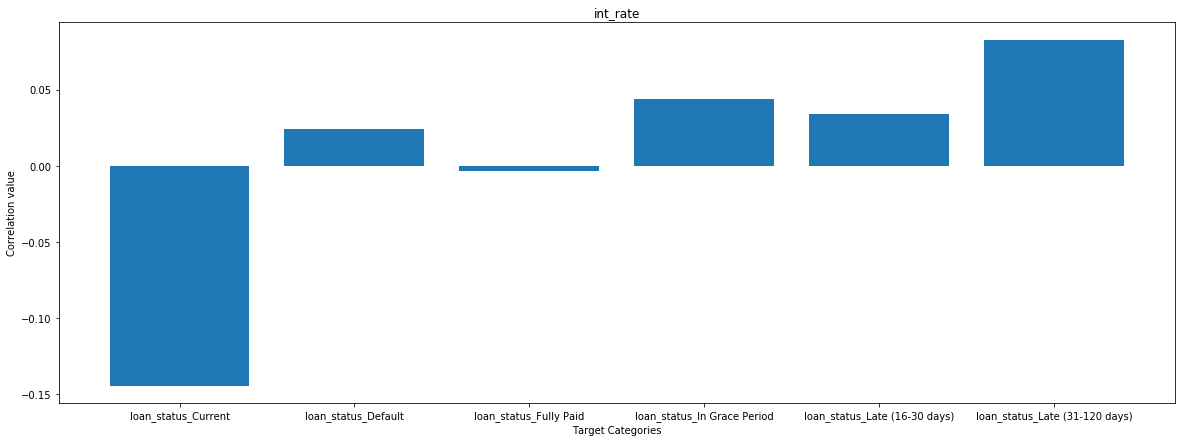

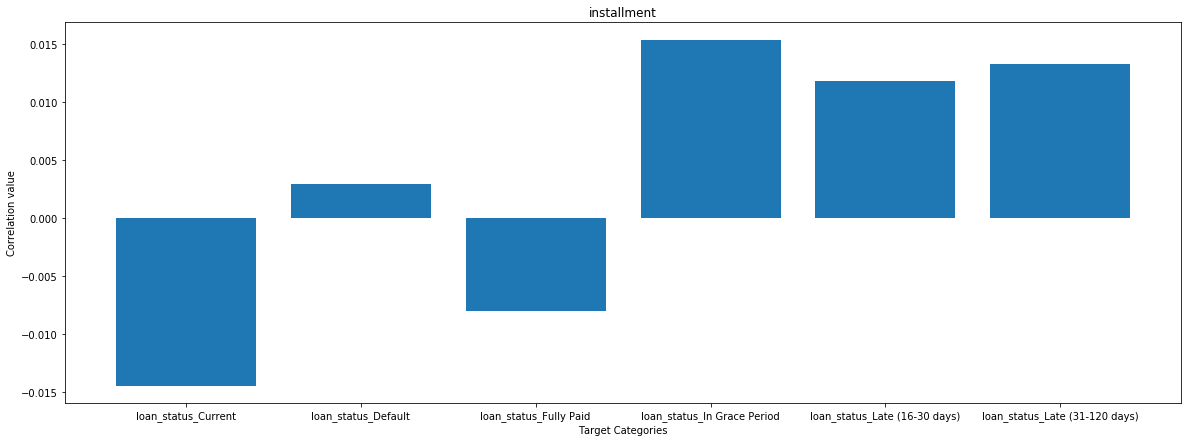

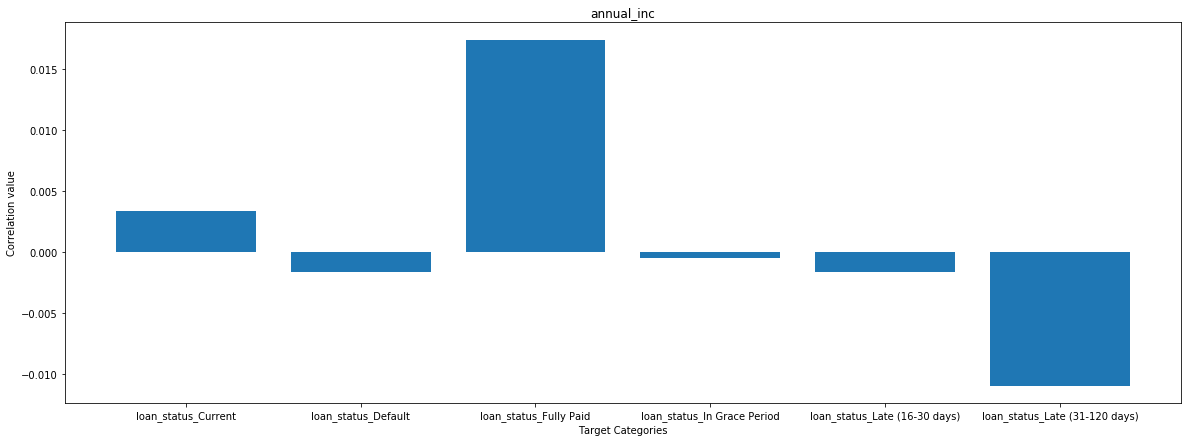

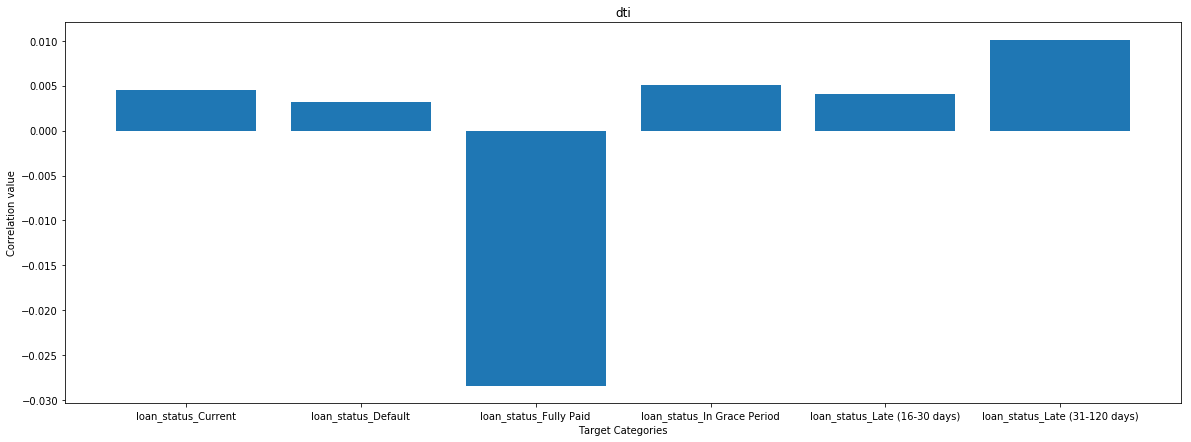

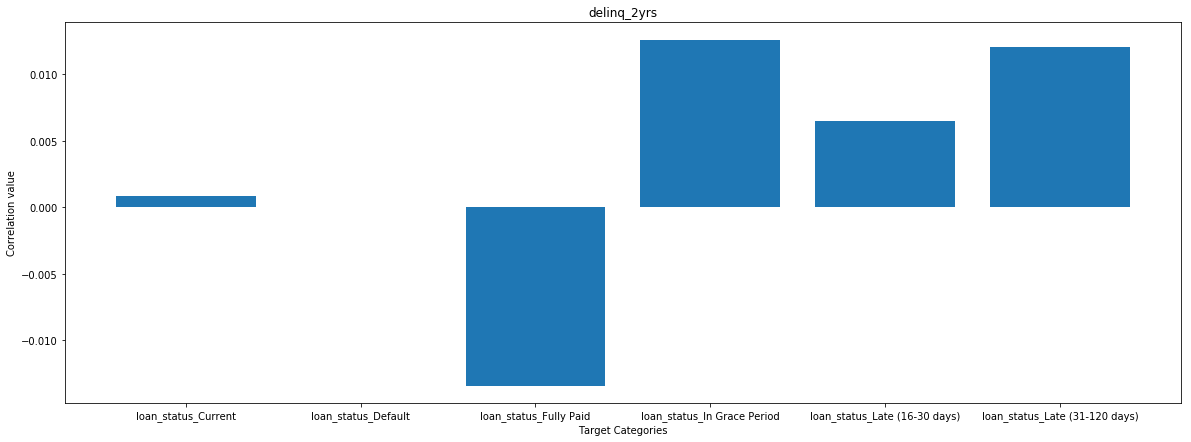

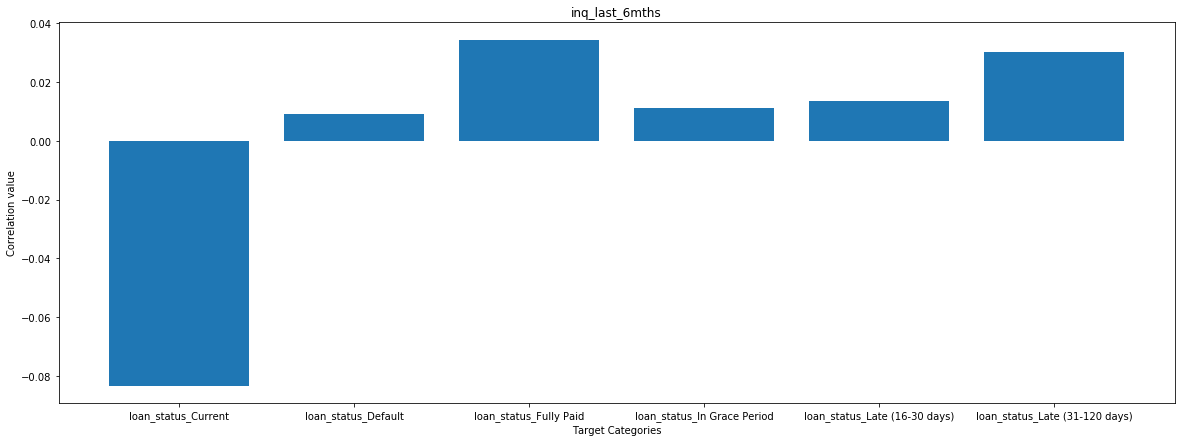

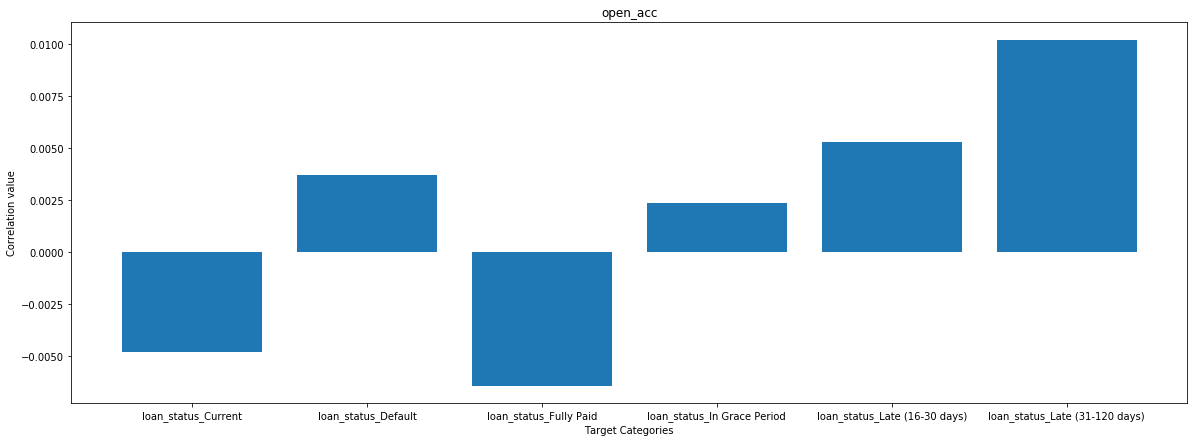

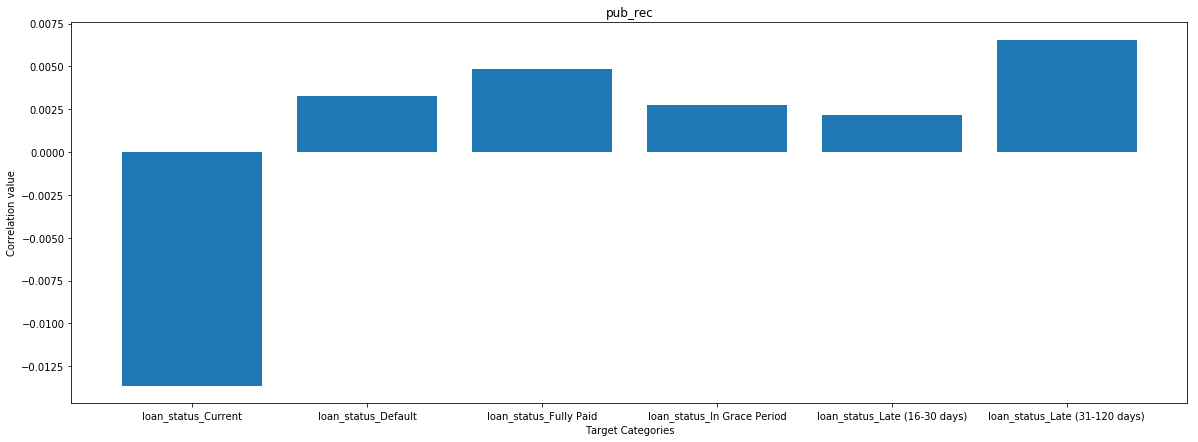

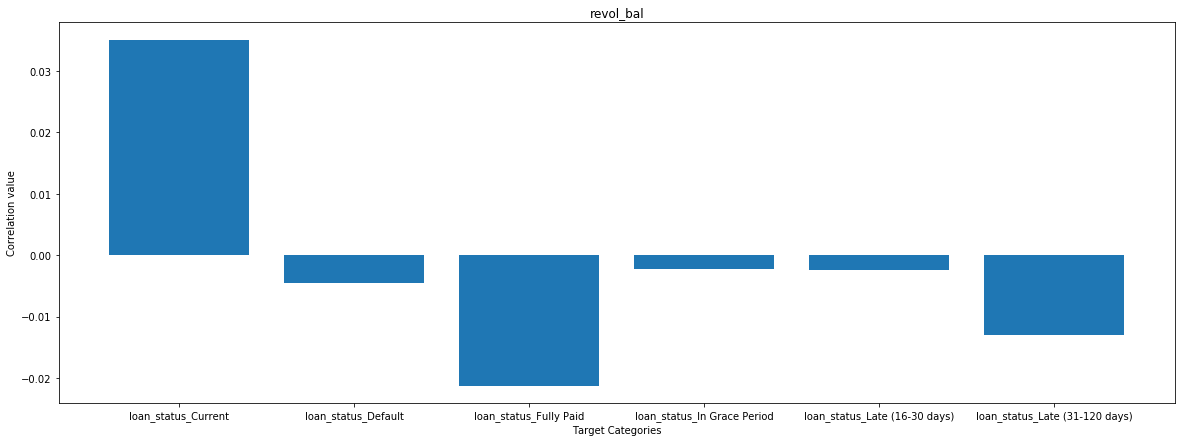

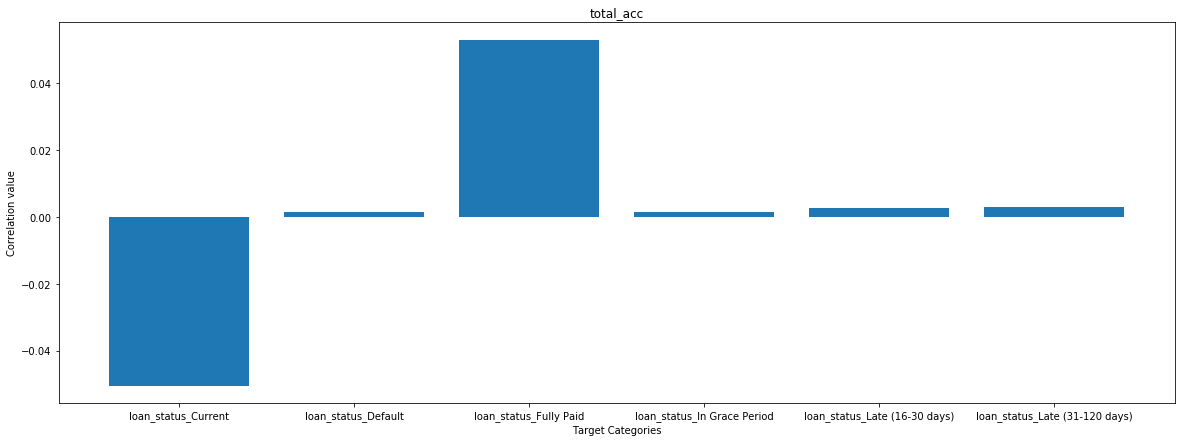

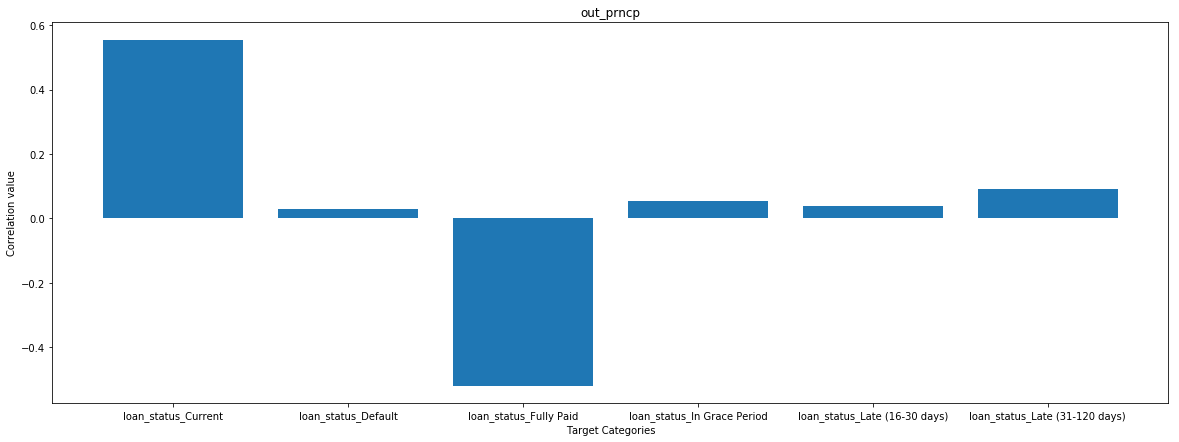

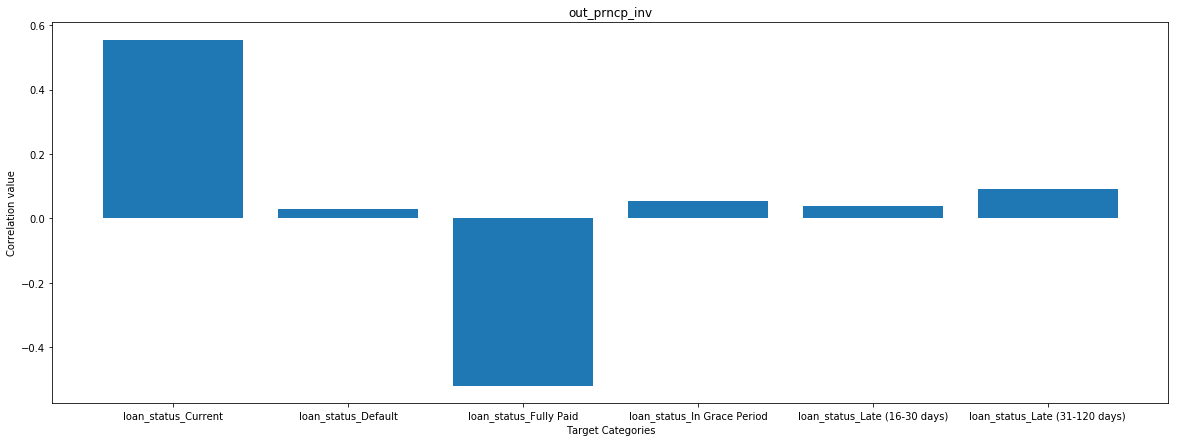

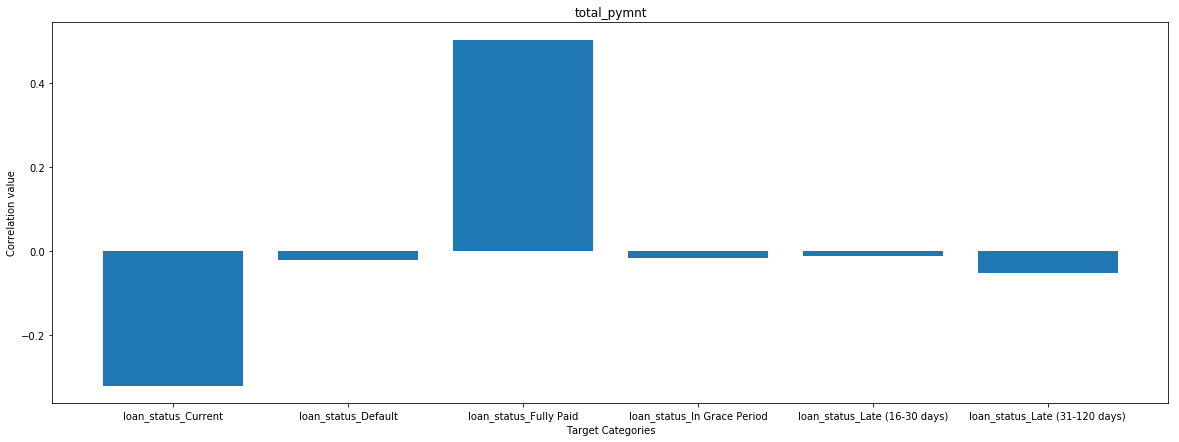

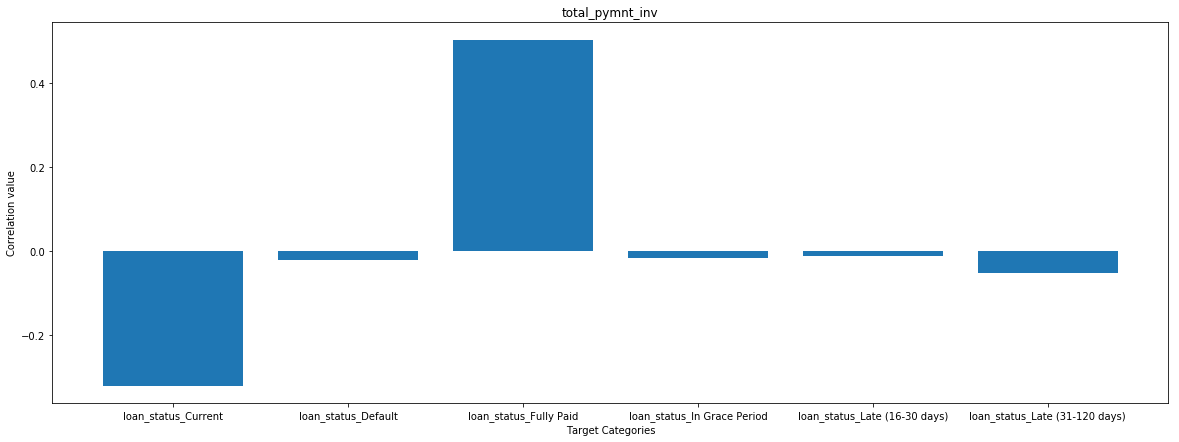

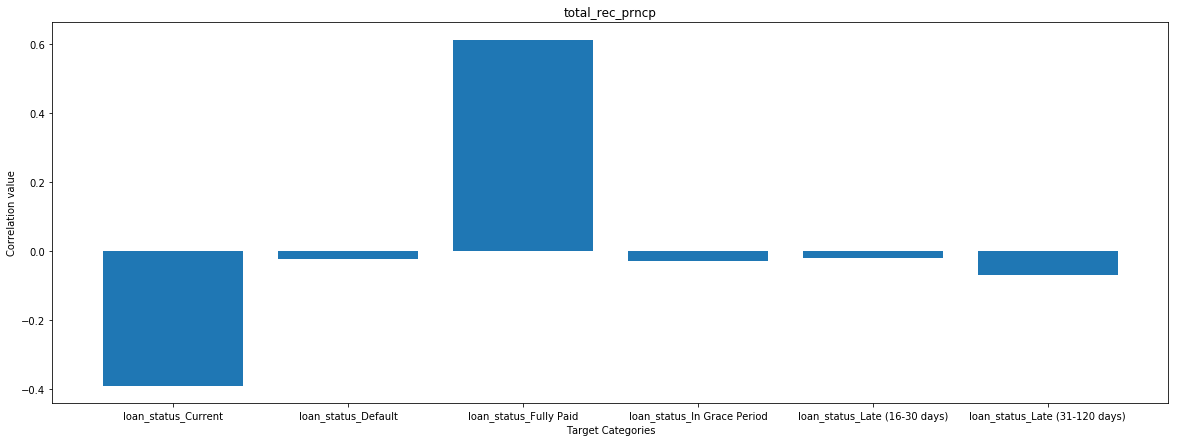

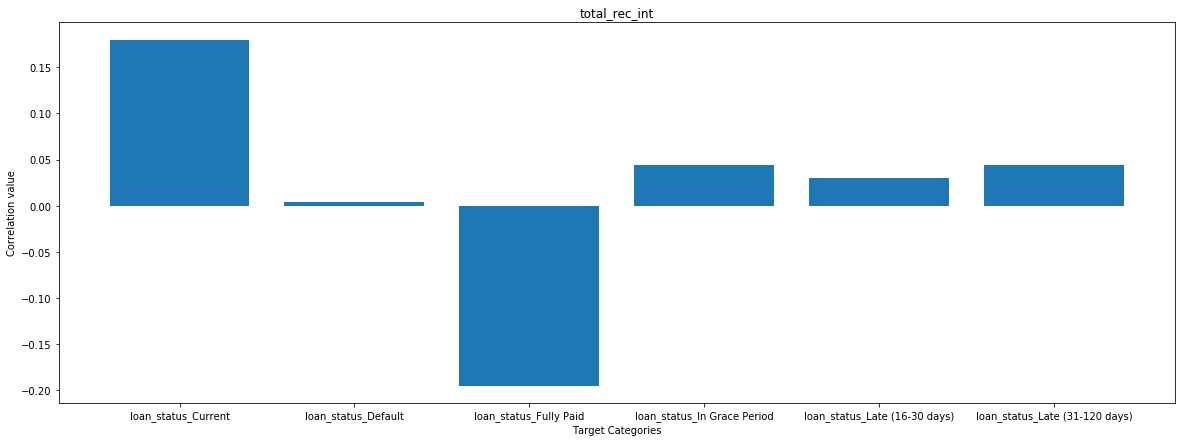

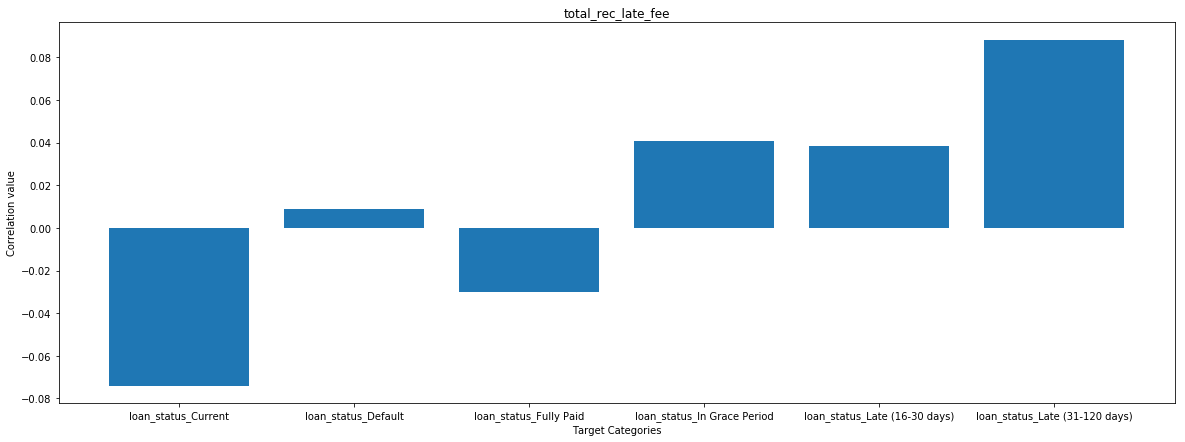

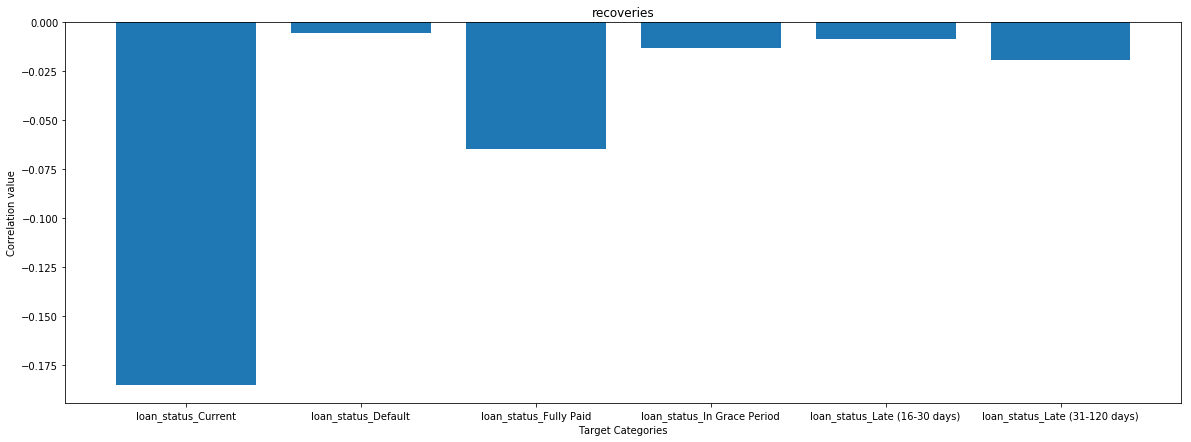

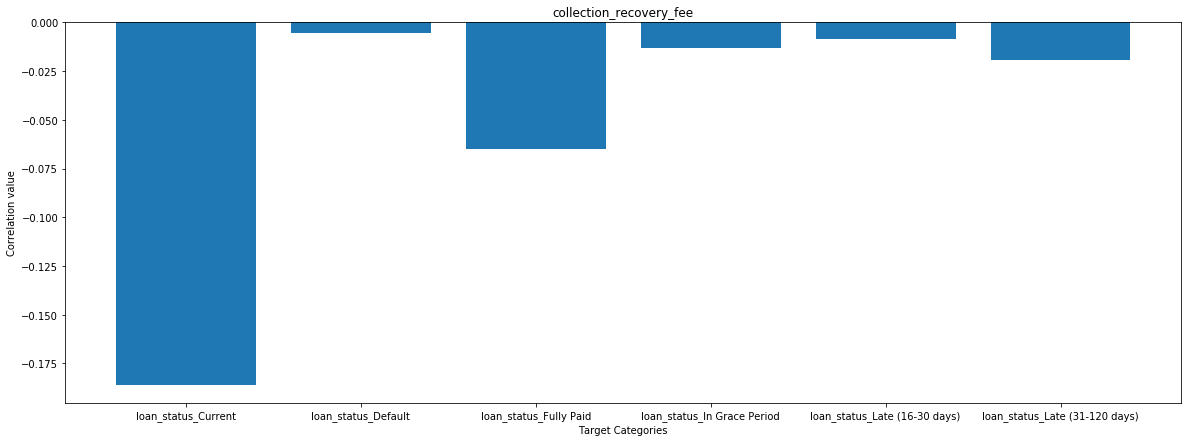

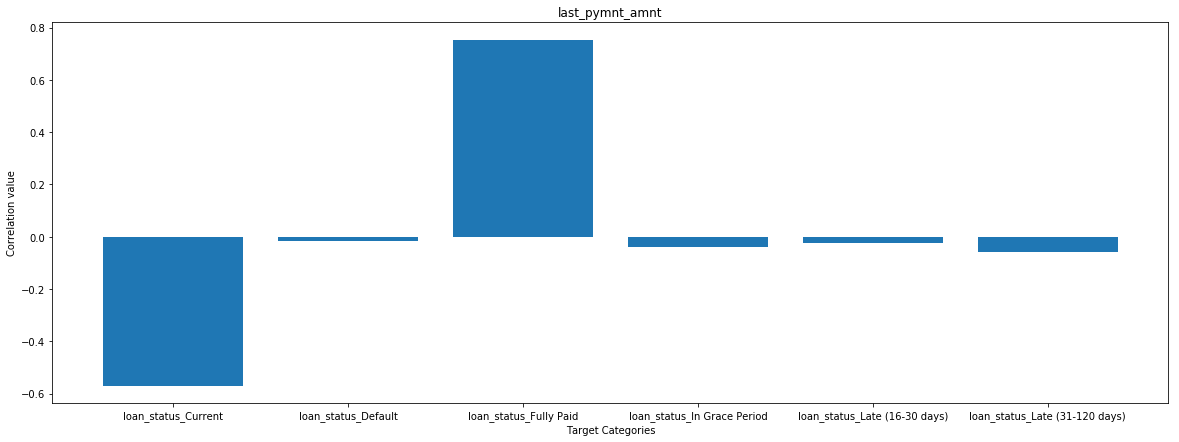

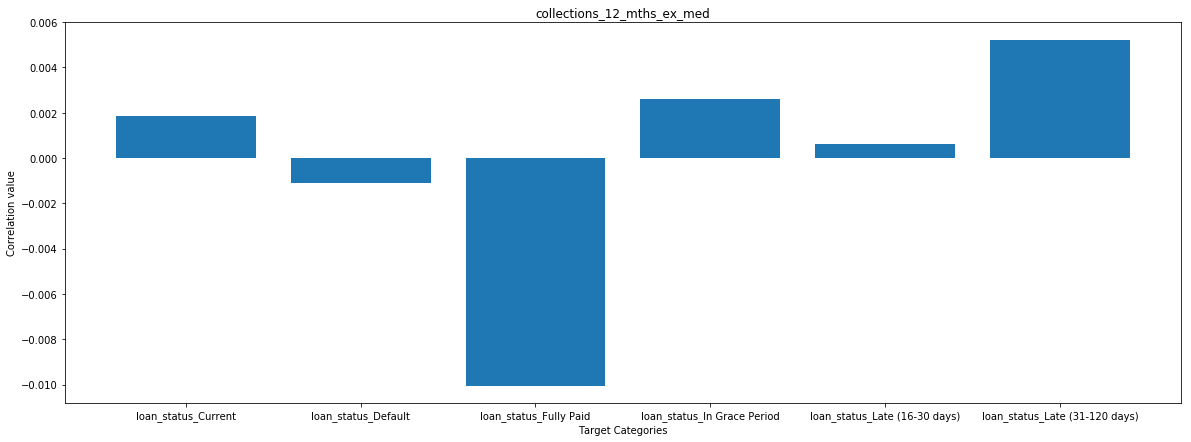

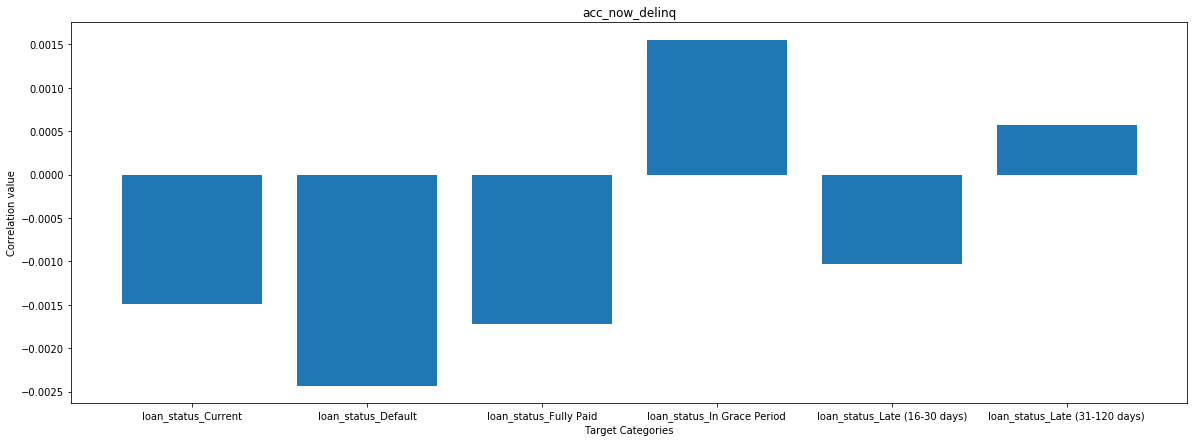

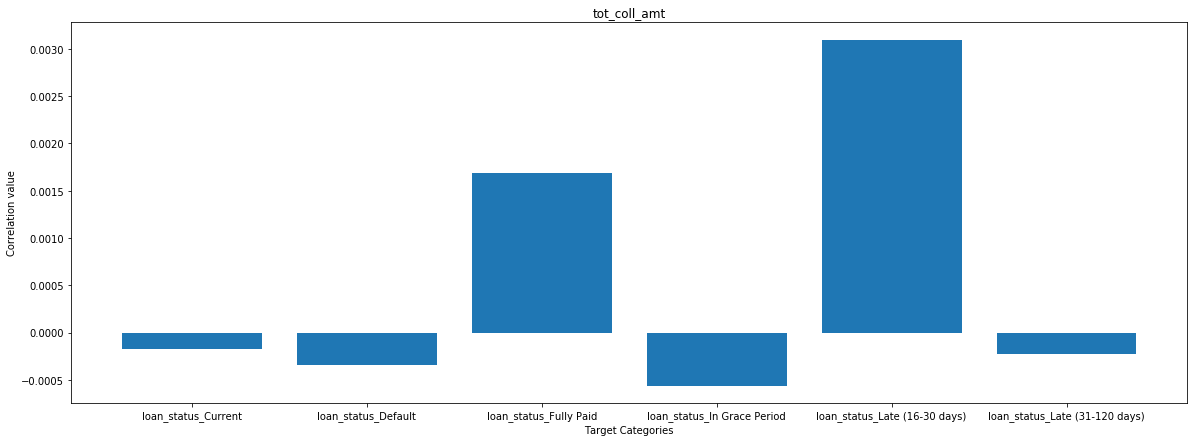

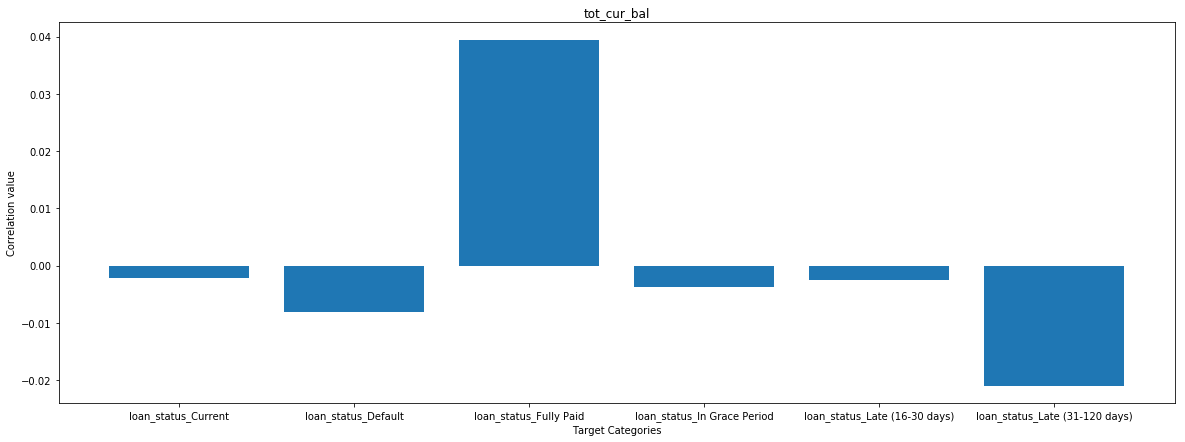

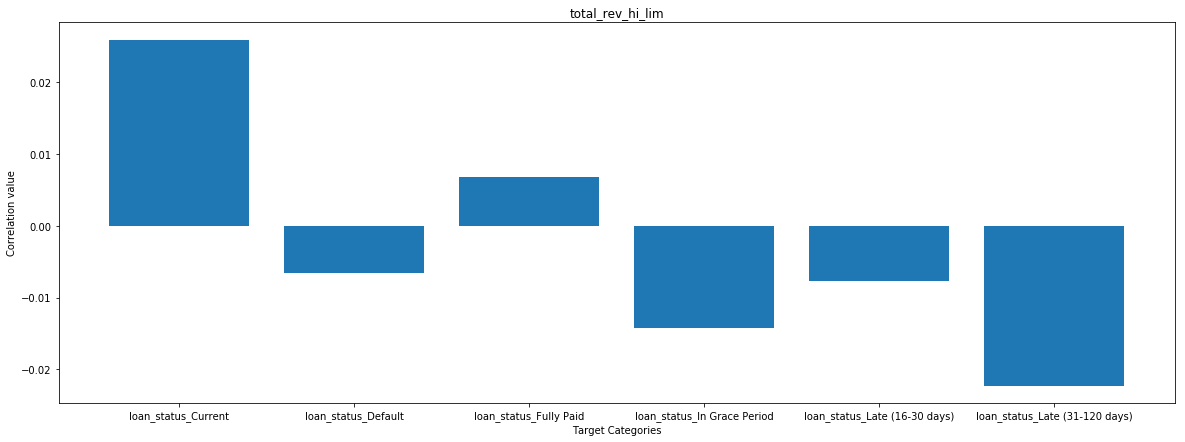

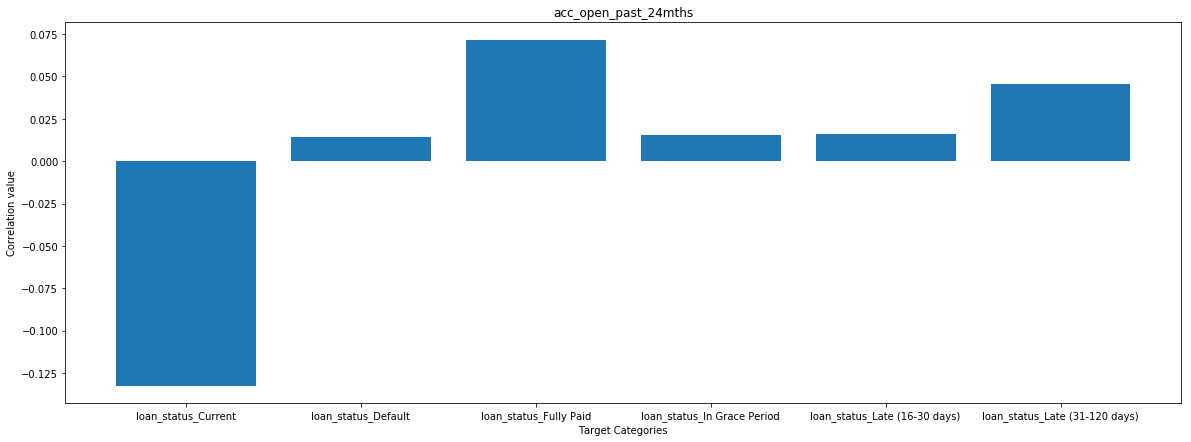

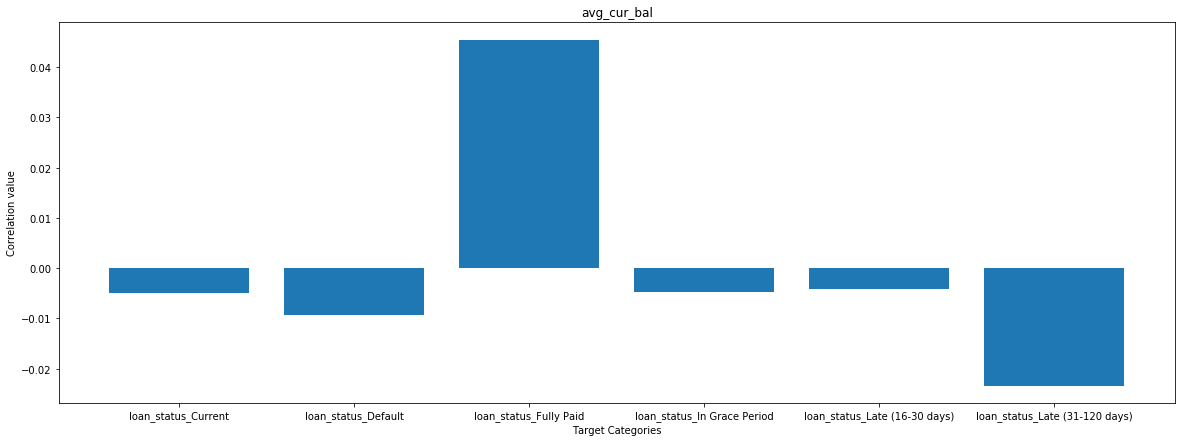

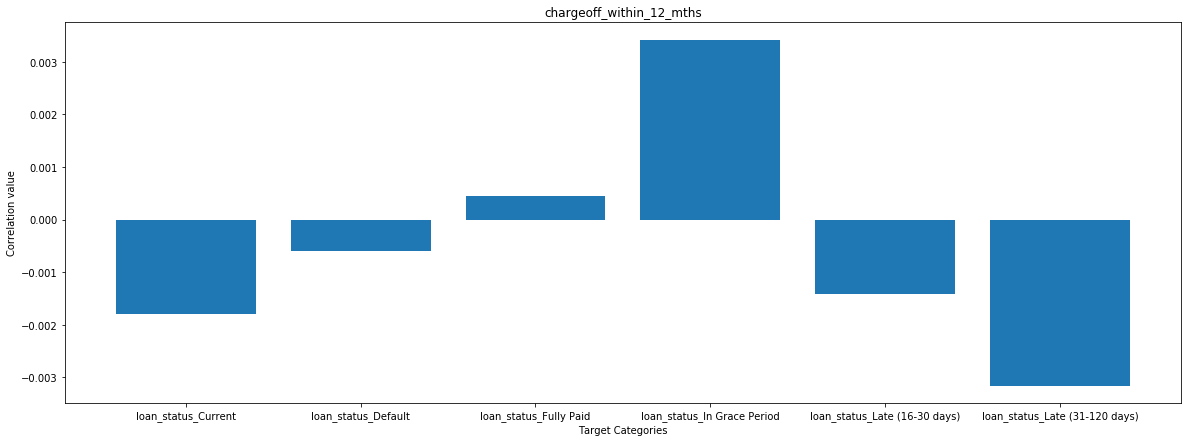

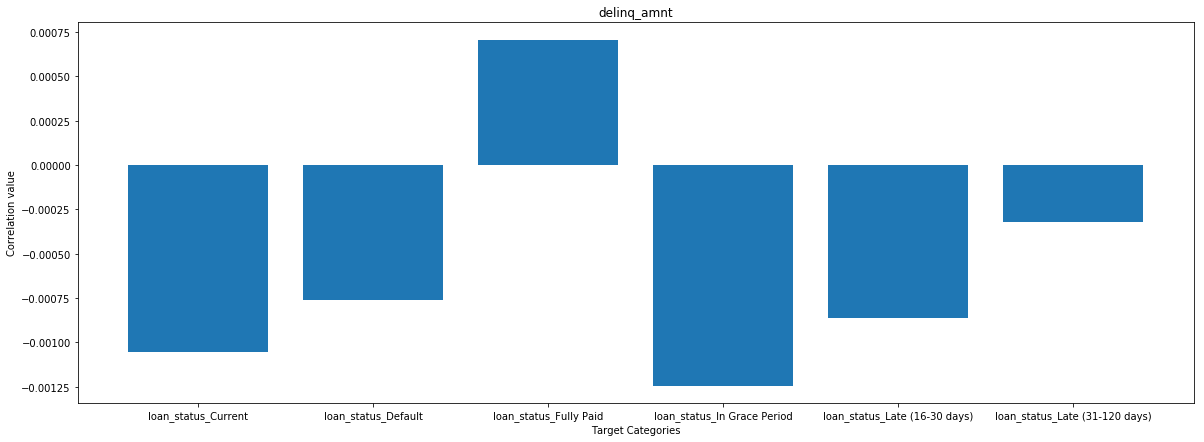

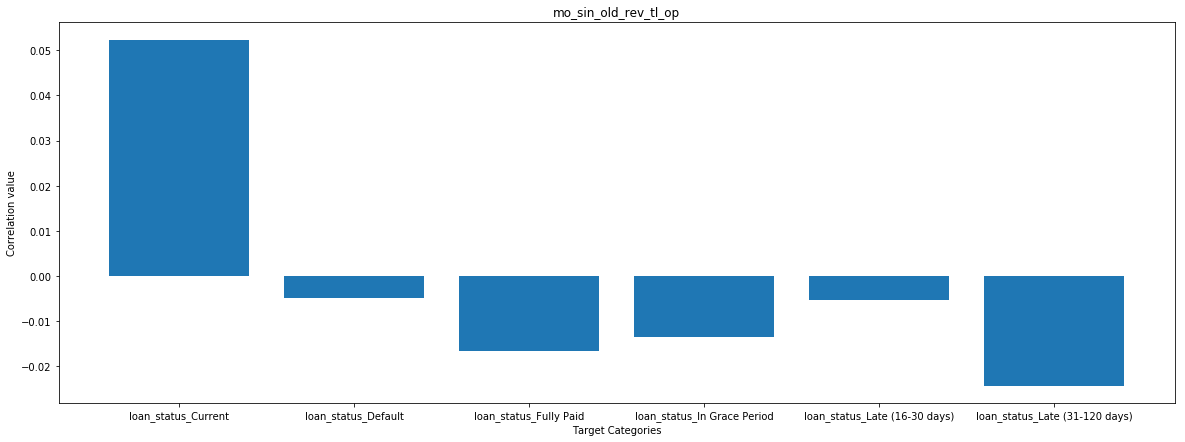

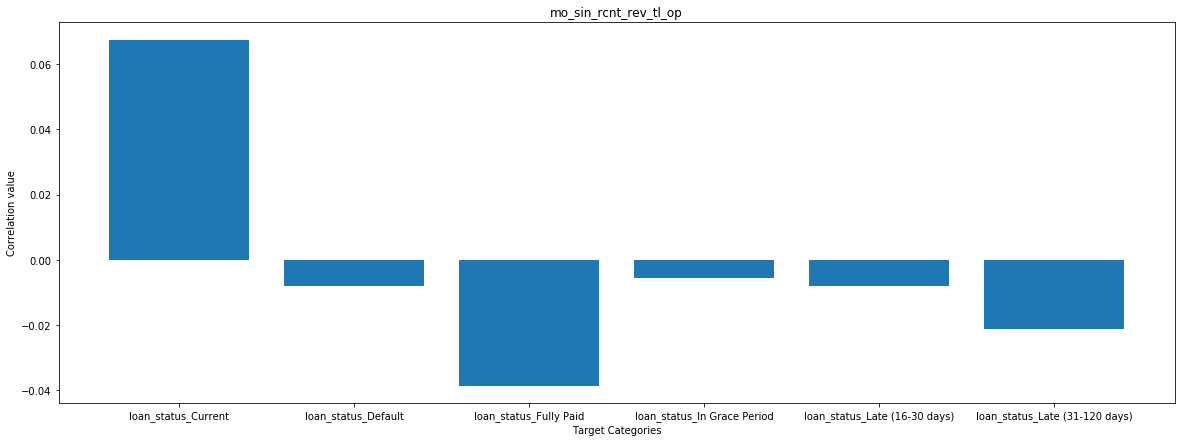

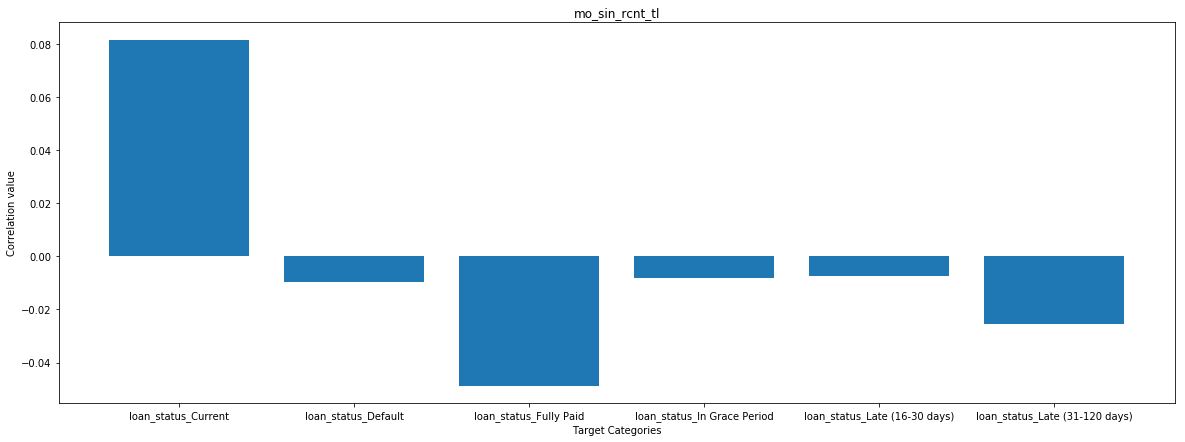

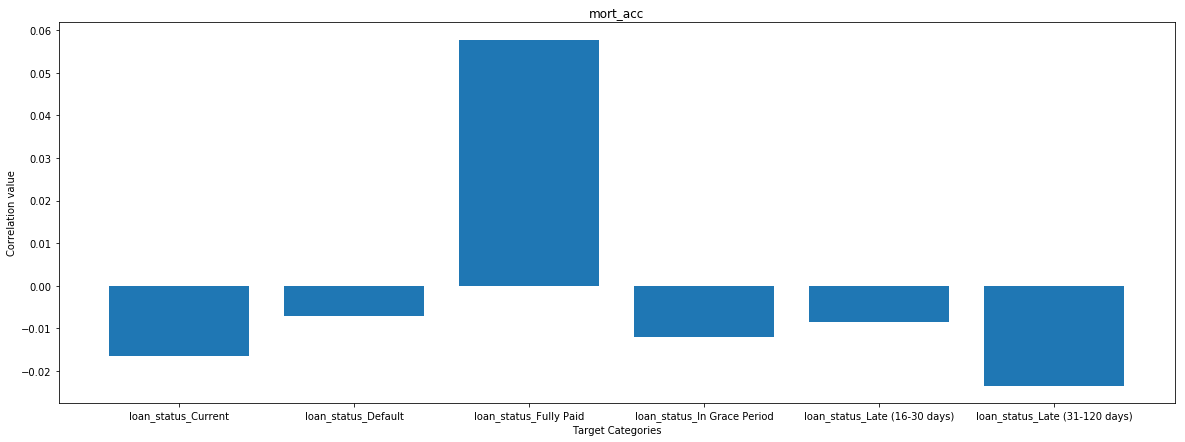

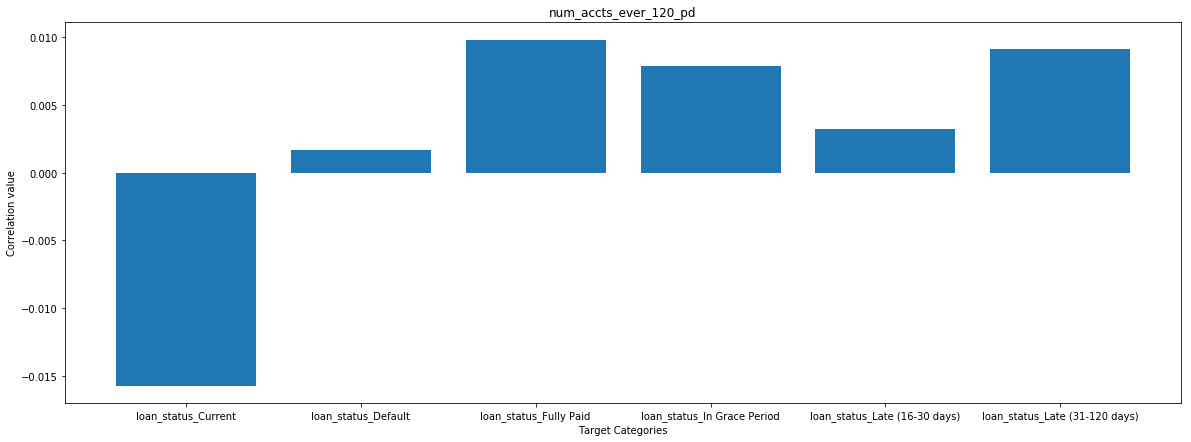

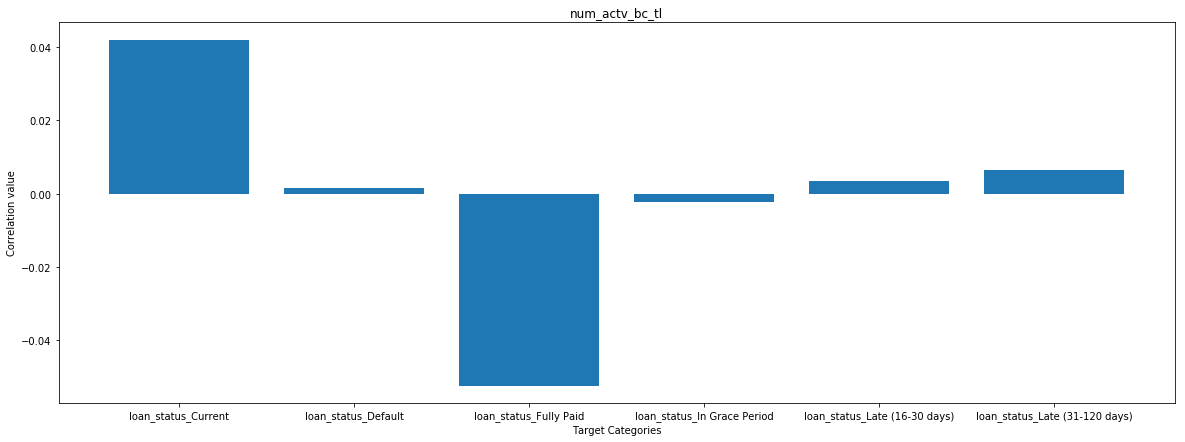

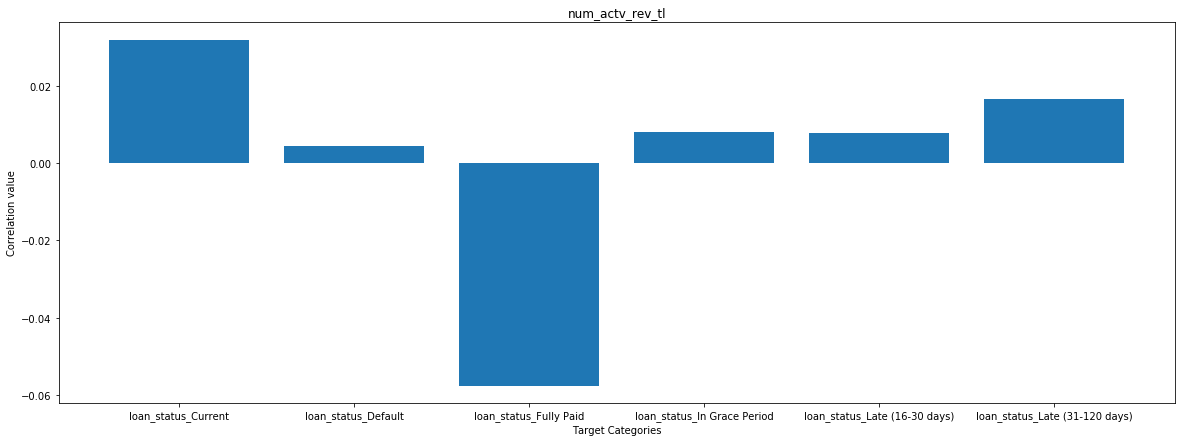

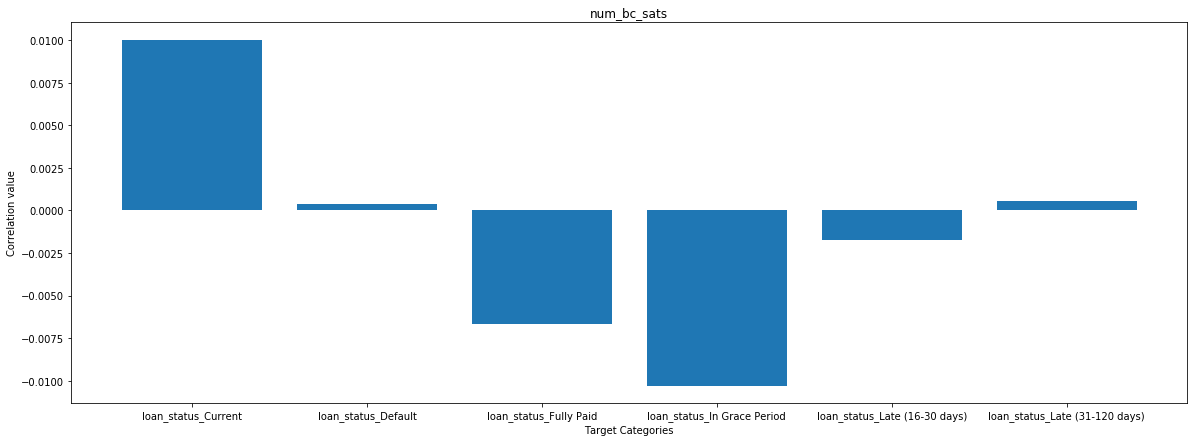

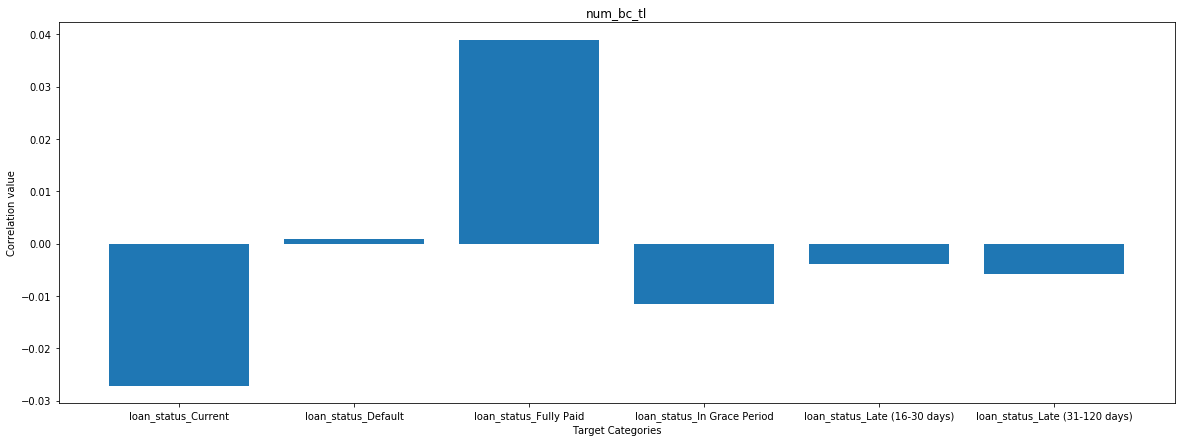

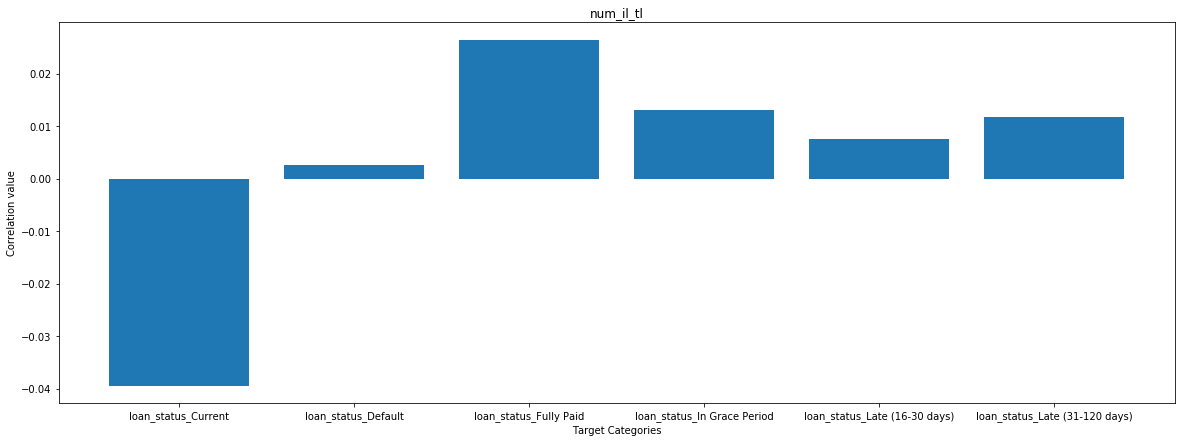

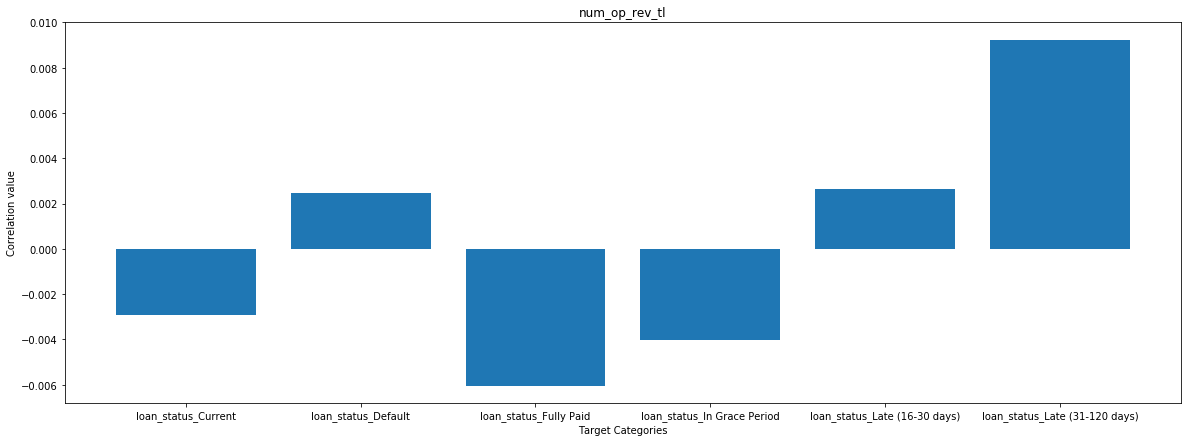

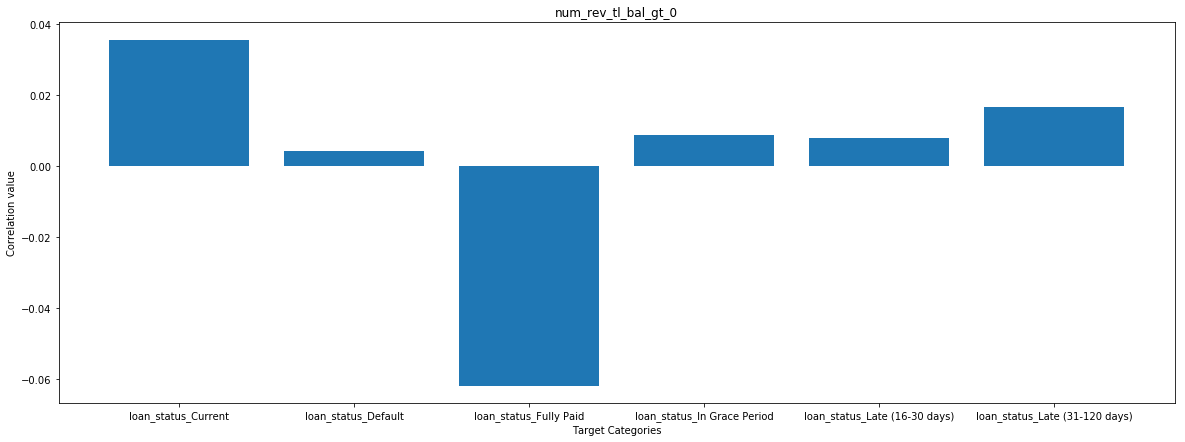

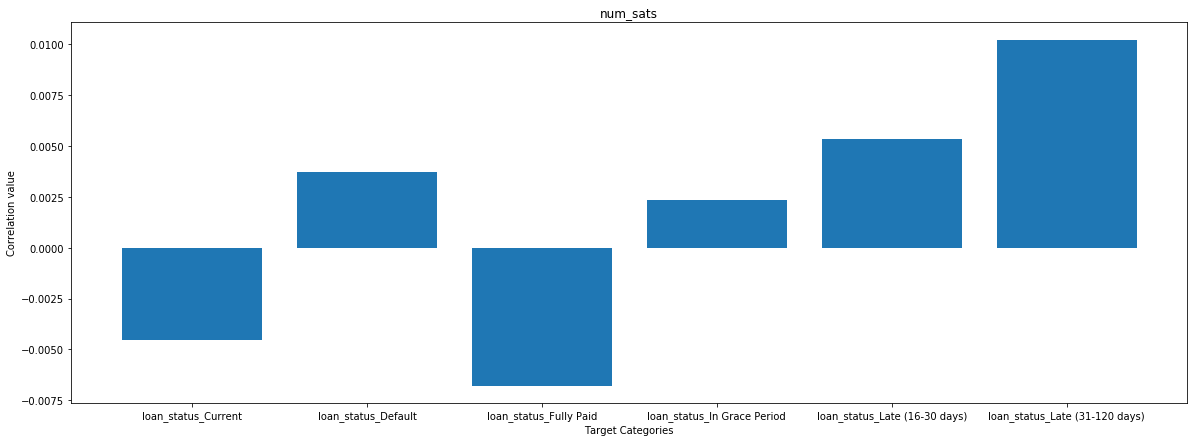

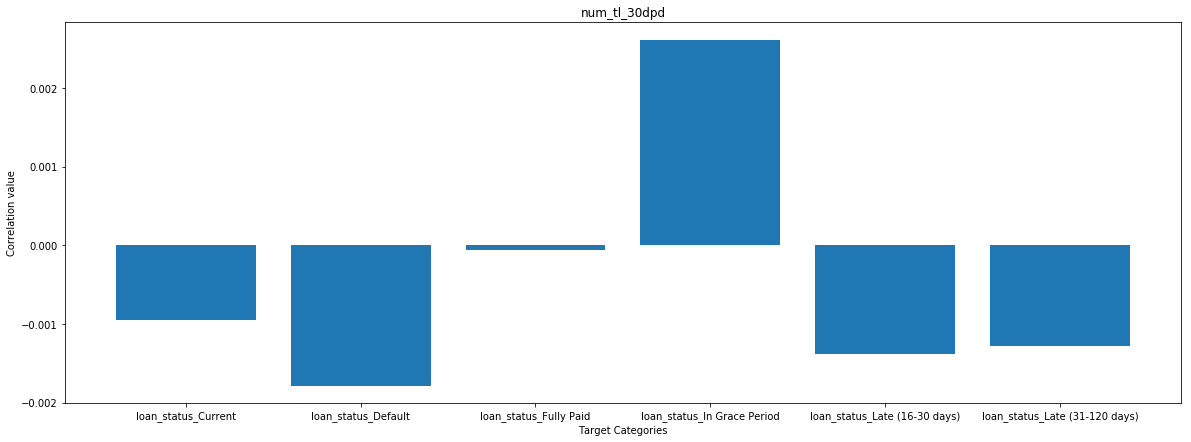

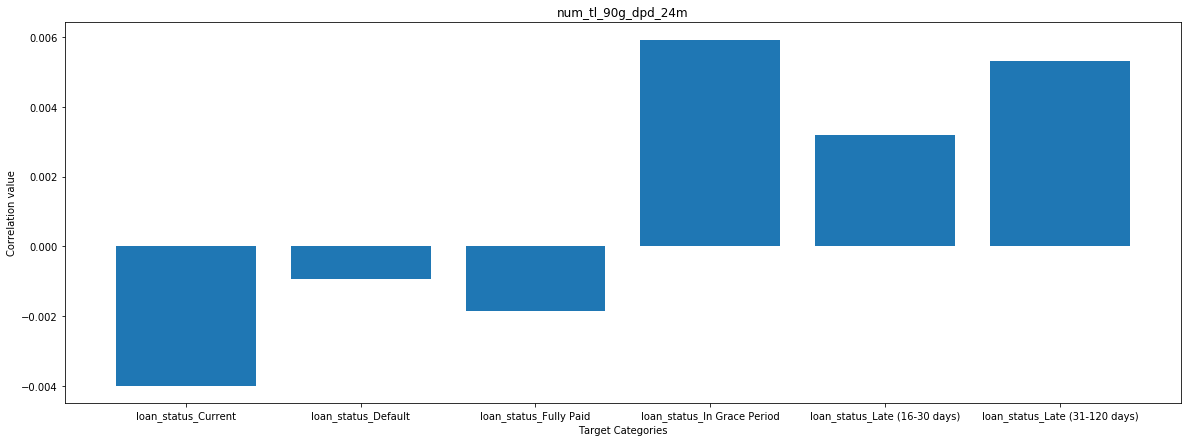

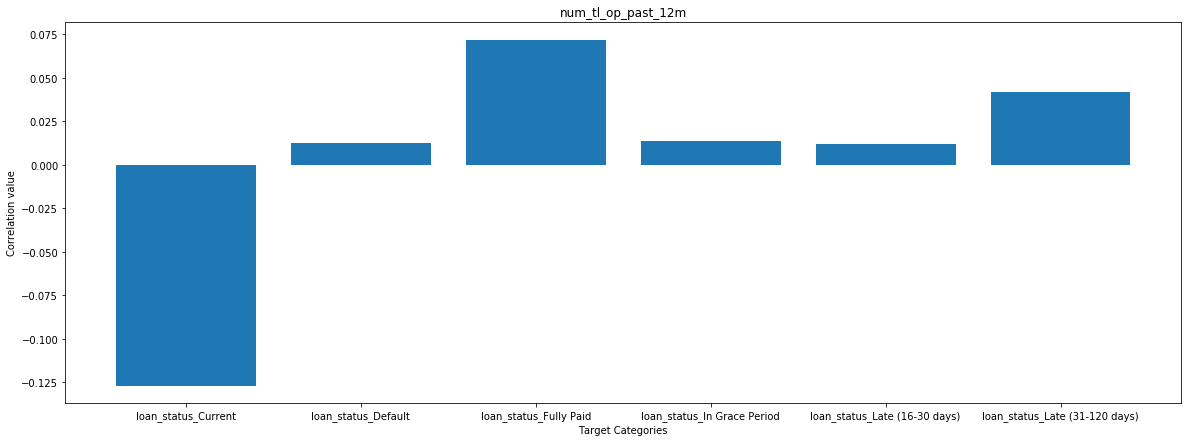

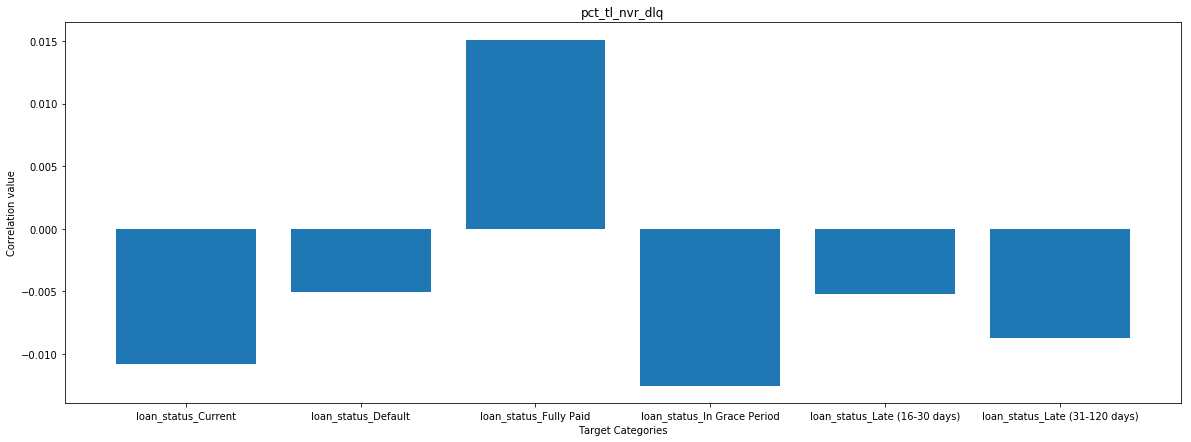

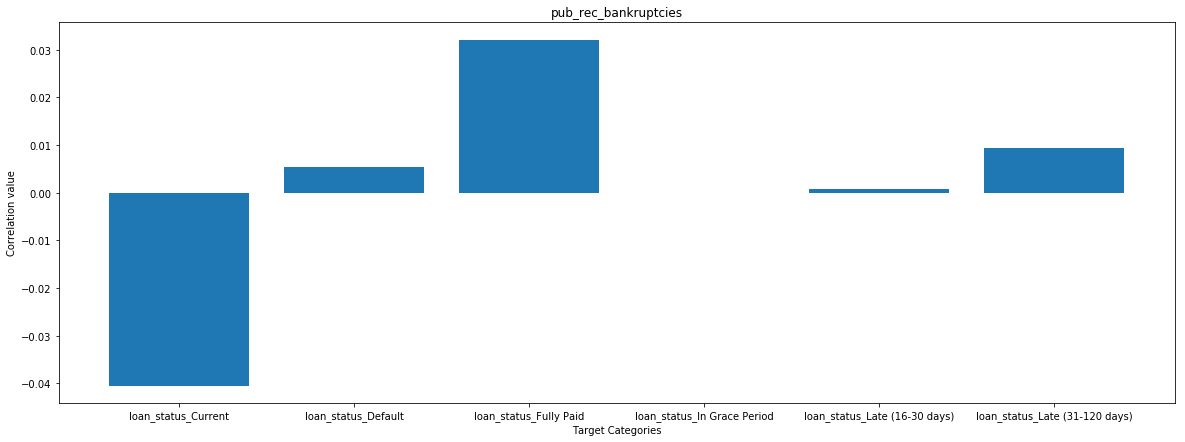

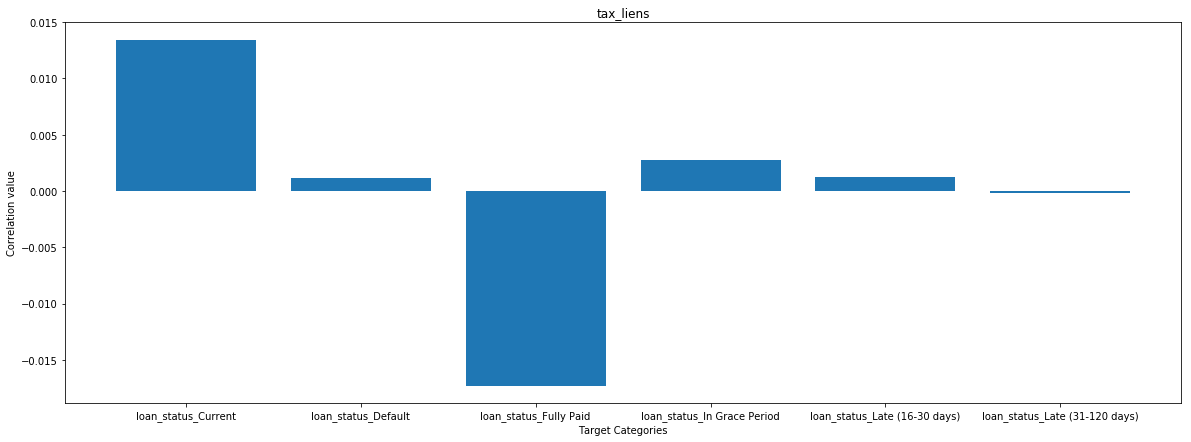

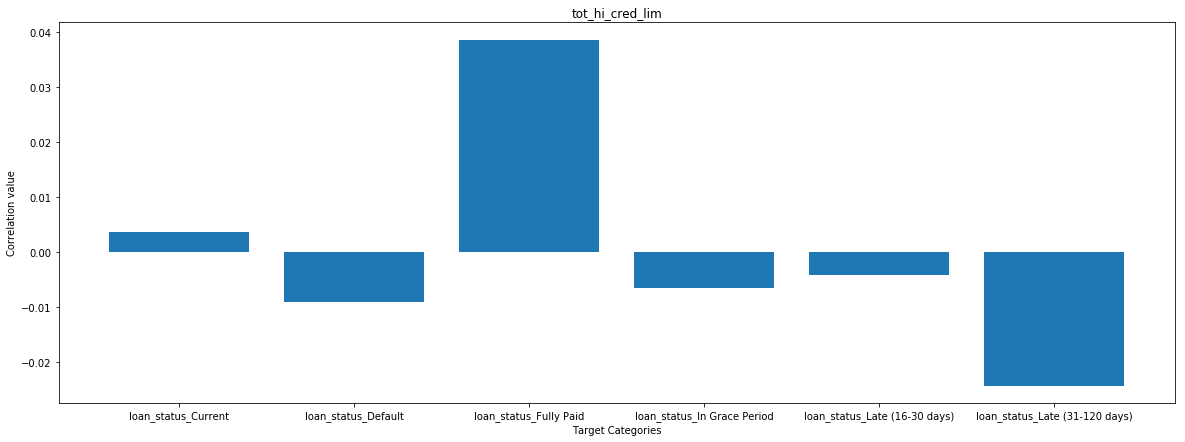

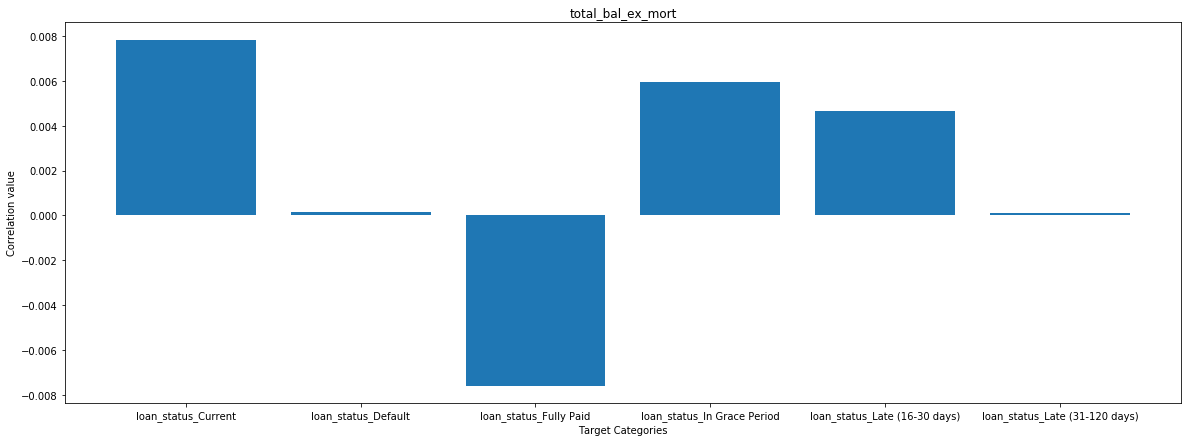

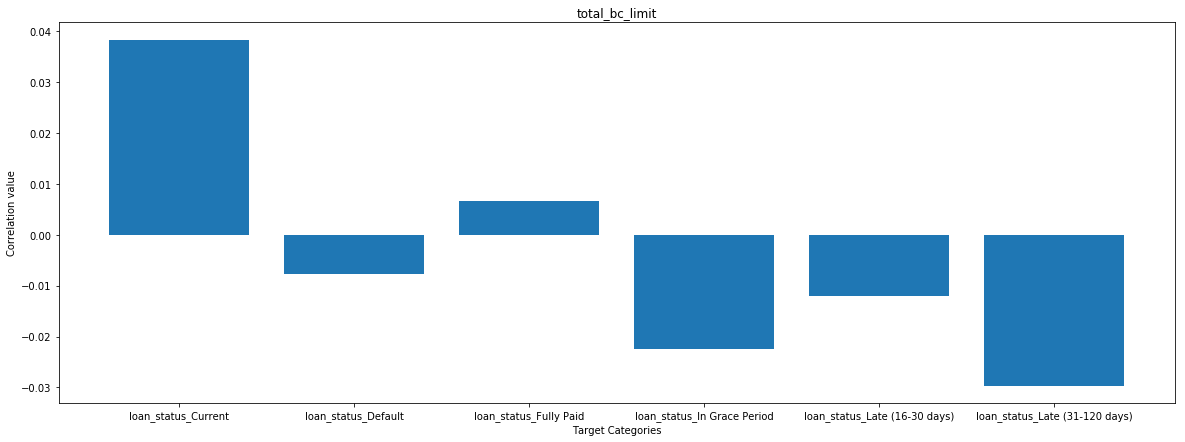

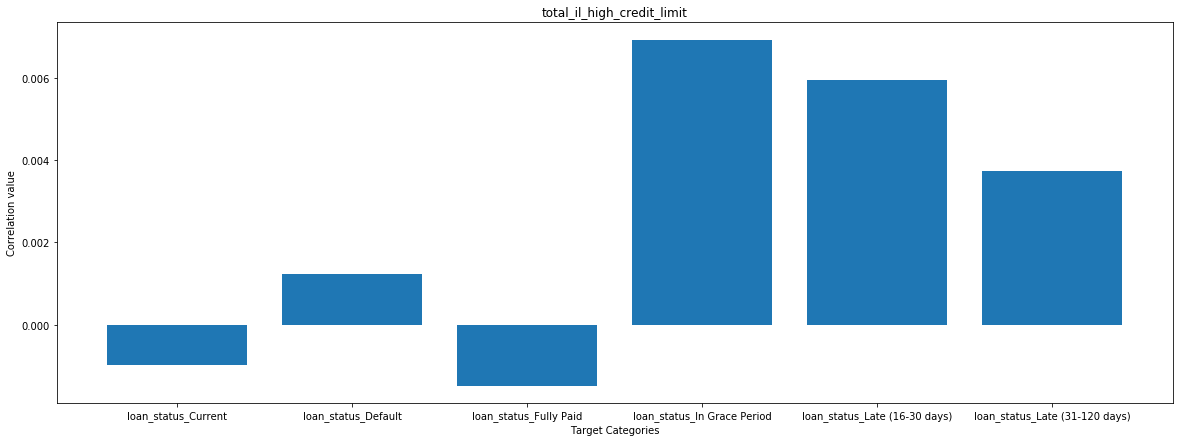

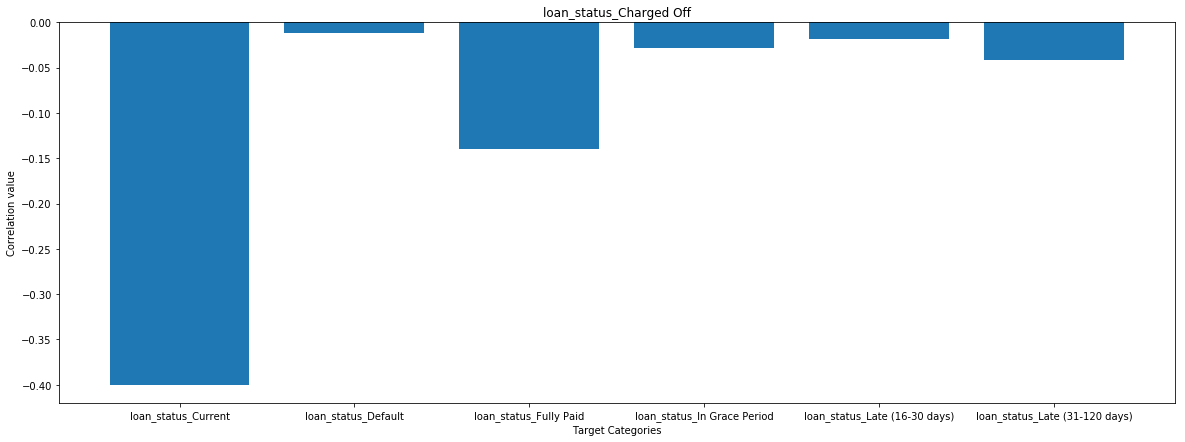

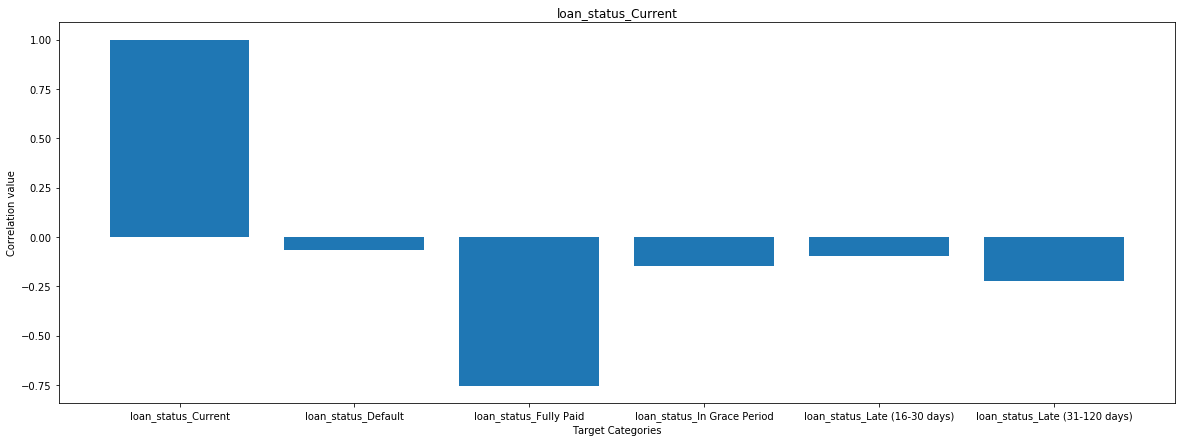

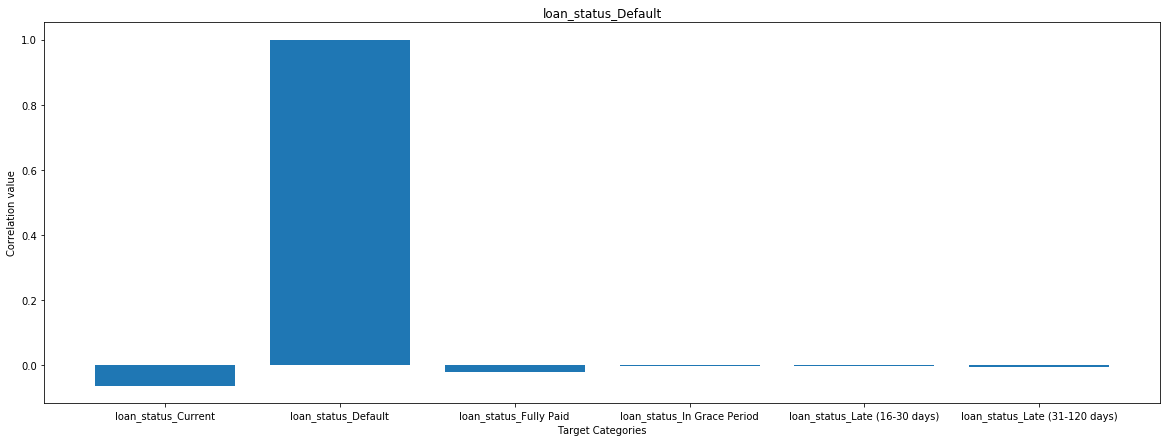

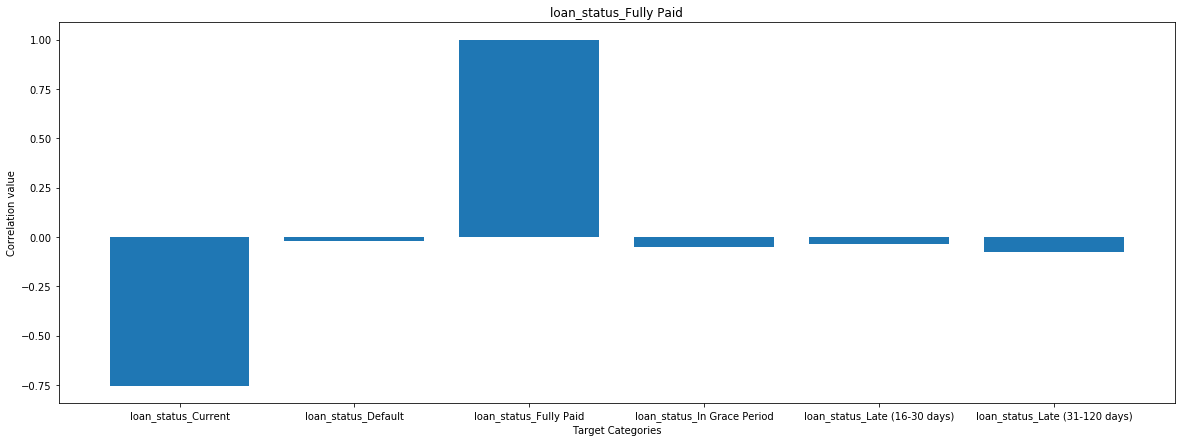

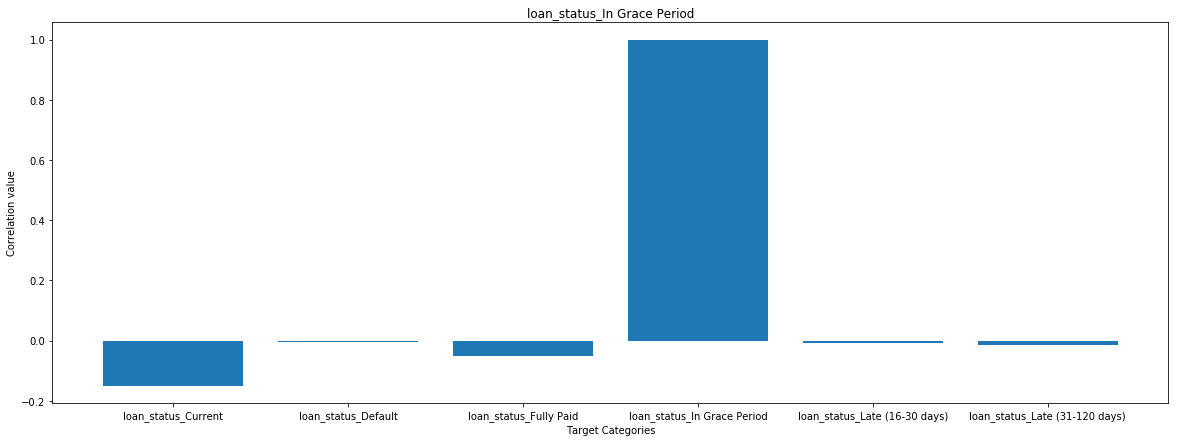

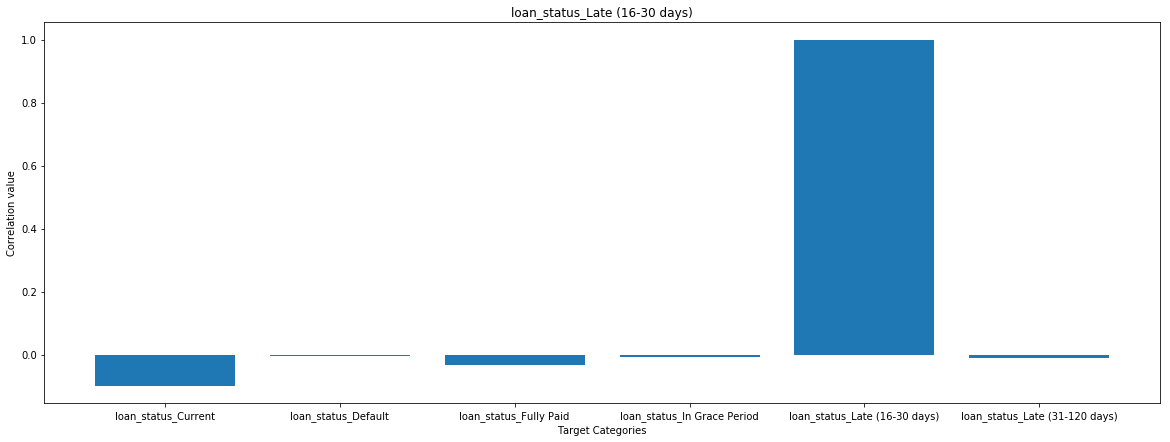

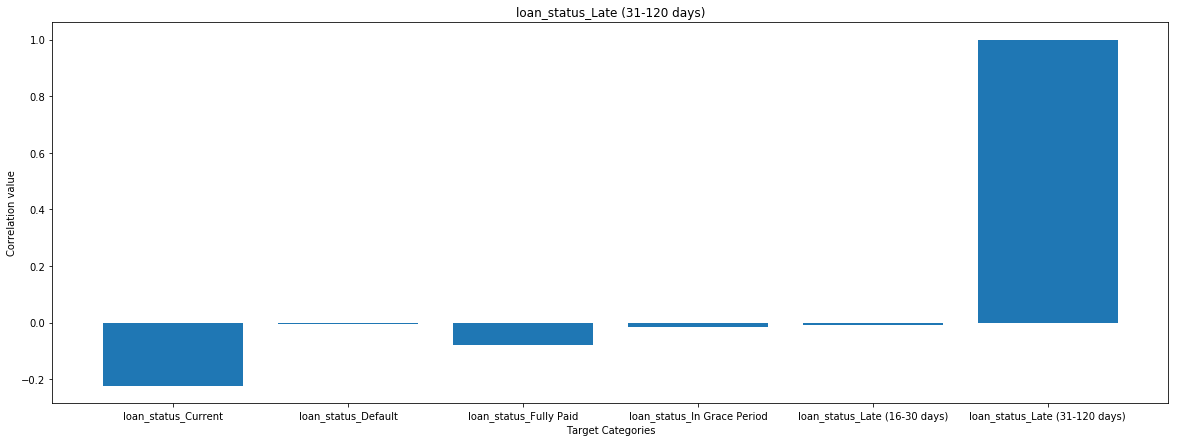

In [37]:


for col in y_val:
  plt.figure(figsize=(20,7))
  plt.bar(bar_corr.index, y_val[col])
  plt.xlabel('Target Categories')
  plt.ylabel('Correlation value')
  plt.title(col)
  plt.show()



In [38]:
X.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_Apr-2015,issue_d_Aug-2015,issue_d_Dec-2015,issue_d_Feb-2015,issue_d_Jan-2015,issue_d_Jul-2015,issue_d_Jun-2015,issue_d_Mar-2015,issue_d_May-2015,issue_d_Nov-2015,issue_d_Oct-2015,issue_d_Sep-2015,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),pymnt_plan_n,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,title_Business,title_Car financing,title_Credit Card/Auto Repair,title_Credit card refinancing,title_Debt consolidation,title_DebtC,title_Green loan,title_Home buying,title_Home improvement,title_Learning and training,title_Major purchase,title_Medical expenses,title_Moving and relocation,title_New Baby and New House (CC Consolidate),title_Other,title_Pay off Lowes Card,title_Paying off higher interest cards & auto,title_Prescription Drug and Medical Costs,title_SAVE,title_Simple Loan Until Contract Is Completed,title_Student Loan,title_Trying to come back to reality!,title_Vacation,title_considerate,title_new day,title_new kitchen for momma!,title_odymeds,initial_list_status_f,initial_list_status_w,last_pymnt_d_Apr-2015,last_pymnt_d_Apr-2016,last_pymnt_d_Aug-2015,last_pymnt_d_Aug-2016,last_pymnt_d_Dec-2015,last_pymnt_d_Dec-2016,last_pymnt_d_Feb-2015,last_pymnt_d_Feb-2016,last_pymnt_d_Jan-2015,last_pymnt_d_Jan-2016,last_pymnt_d_Jan-2017,last_pymnt_d_Jul-2015,last_pymnt_d_Jul-2016,last_pymnt_d_Jun-2015,last_pymnt_d_Jun-2016,last_pymnt_d_Mar-2015,last_pymnt_d_Mar-2016,last_pymnt_d_May-2015,last_pymnt_d_May-2016,last_pymnt_d_Nov-2015,last_pymnt_d_Nov-2016,last_pymnt_d_Oct-2015,last_pymnt_d_Oct-2016,last_pymnt_d_Sep-2015,last_pymnt_d_Sep-2016,next_pymnt_d_Feb-2017,next_pymnt_d_Jan-2017,next_pymnt_d_Jul-2016,next_pymnt_d_Mar-2017,last_credit_pull_d_Apr-2015,last_credit_pull_d_Apr-2016,last_credit_pull_d_Aug-2015,last_credit_pull_d_Aug-2016,last_credit_pull_d_Dec-2014,last_credit_pull_d_Dec-2015,last_credit_pull_d_Dec-2016,last_credit_pull_d_Feb-2015,last_credit_pull_d_Feb-2016,last_credit_pull_d_Jan-2015,last_credit_pull_d_Jan-2016,last_credit_pull_d_Jan-2017,last_credit_pull_d_Jul-2015,last_credit_pull_d_Jul-2016,last_credit_pull_d_Jun-2015,last_credit_pull_d_Jun-2016,last_credit_pull_d_Mar-2015,last_credit_pull_d_Mar-2016,last_credit_pull_d_May-2015,last_credit_pull_d_May-2016,last_credit_pull_d_Nov-2015,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last

In [39]:
X.groupby(['loan_status_Charged Off', 'loan_status_Current', 'loan_status_Default', 'loan_status_Fully Paid',
          'loan_status_In Grace Period', 'loan_status_Late (16-30 days)', 'loan_status_Late (31-120 days)'])['int_rate'].mean()

loan_status_Charged Off  loan_status_Current  loan_status_Default  loan_status_Fully Paid  loan_status_In Grace Period  loan_status_Late (16-30 days)  loan_status_Late (31-120 days)
0                        0                    0                    0                       0                            0                              1                                 14.951743
                                                                                                                        1                              0                                 14.797664
                                                                                           1                            0                              0                                 14.454544
                                                                   1                       0                            0                              0                                 12.569738
                                      

In [40]:
for col in df_1_1:
  print(col)
  print(X.groupby(['loan_status_Charged Off', 'loan_status_Current', 
                   'loan_status_Default', 'loan_status_Fully Paid',
                   'loan_status_In Grace Period', 'loan_status_Late (16-30 days)', 
                   'loan_status_Late (31-120 days)'])[col].mean())
  print()

funded_amnt_inv
loan_status_Charged Off  loan_status_Current  loan_status_Default  loan_status_Fully Paid  loan_status_In Grace Period  loan_status_Late (16-30 days)  loan_status_Late (31-120 days)
0                        0                    0                    0                       0                            0                              1                                 15758.241325
                                                                                                                        1                              0                                 16494.570975
                                                                                           1                            0                              0                                 16224.618056
                                                                   1                       0                            0                              0                                 14681.058996
          

In [0]:
new_x = df_1_1[['out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'acc_now_delinq',
                'total_rev_hi_lim', 'avg_cur_bal', 'chargeoff_within_12_mths', 'delinq_amnt', 'tot_hi_cred_lim', 'total_bc_limit']]

In [45]:
new_x.shape

(421095, 14)

In [48]:
score_14 = cross_val_score(rfc, new_x, y, cv=10)

print(score)
print(score.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

[0.89750896 0.90076227 0.90211584 0.90555912 0.90417953 0.90463073
 0.90241991 0.90163623 0.90505142 0.89771054]
0.9021574545389702


In [49]:
print(score_14)
print(score_14.mean())

[0.91294436 0.96898673 0.96497352 0.96129277 0.96036571 0.96017573
 0.96000855 0.96012729 0.9598879  0.95919821]
0.9567960778794227


In [0]:
.+lllllllllllllllll58,